In [47]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [6]:
bankruptcy_df = pd.read_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_3/Nov_25/Data/cleaned_filled_shrunk_bankruptcy_data.csv')

In [7]:
# couldn't pull with pandas so pulling using requests and impersonating a computer

url = 'https://www.sec.gov/corpfin/division-of-corporation-finance-standard-industrial-classification-sic-code-list'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

sic_codes_df = pd.read_html(r.text)

In [11]:
sic_codes_df[0]

,SIC Code,Office,Industry Title
0,100,Industrial Applications and Services,AGRICULTURAL PRODUCTION-CROPS
1,200,Industrial Applications and Services,AGRICULTURAL PROD-LIVESTOCK & ANIMAL SPECIALTIES
2,700,Industrial Applications and Services,AGRICULTURAL SERVICES
3,800,Industrial Applications and Services,FORESTRY
4,900,Industrial Applications and Services,"FISHING, HUNTING AND TRAPPING"
...,...,...,...
439,8880,Office of International Corp Fin,AMERICAN DEPOSITARY RECEIPTS
440,8888,Office of International Corp Fin,FOREIGN GOVERNMENTS
441,8900,Office of Trade & Services,"SERVICES-SERVICES, NEC"
442,9721,Office of International Corp Fin,INTERNATIONAL AFFAIRS


In [12]:
bankruptcy_df.drop()

,Unnamed: 0,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,Year1Before_StockholdersEquity,...,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity,CIK_number,Bankruptcy_Year,entity.name,report.sic-code,report.filing-date
0,0,1.503000e+09,1.509000e+09,2.864000e+09,-3.638000e+09,-9000000.0,1.458600e+10,2.117930e+11,1.954980e+11,1.600400e+10,...,4.065600e+10,1.767500e+10,1.155110e+11,1.070780e+11,8.220000e+09,719739,2023,SVB FINANCIAL GROUP,6022.0,2023-02-24
1,1,7.867778e+09,-5.596230e+08,1.785400e+07,-3.491820e+08,-606018000.0,1.352984e+09,5.130572e+09,4.956427e+09,1.741450e+08,...,-1.828460e+08,1.000340e+09,7.790515e+09,6.025580e+09,1.764935e+09,886158,2023,BED BATH & BEYOND INC.,5700.0,2023-06-14
2,2,2.490000e+09,-2.096000e+09,3.120000e+08,-1.080000e+08,406000000.0,4.980000e+08,4.073000e+09,5.350000e+09,-1.302000e+09,...,-4.890000e+08,7.270000e+08,6.231000e+09,5.867000e+09,2.360000e+08,1418100,2023,AVAYA HOLDINGS CORP.,7372.0,2023-09-08
3,3,NaN,NaN,NaN,NaN,NaN,4.791400e+07,NaN,NaN,NaN,...,9.370400e+07,1.195320e+08,2.806455e+09,2.755934e+09,5.079000e+07,1592058,2023,Party City Holdco Inc.,5900.0,2022-11-08
4,4,NaN,NaN,NaN,NaN,NaN,1.676010e+08,NaN,NaN,NaN,...,-2.638000e+06,2.788410e+08,2.458064e+09,1.363763e+09,1.094301e+09,1870997,2023,Loyalty Ventures Inc.,7389.0,2022-11-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,257,NaN,-3.329445e+08,-1.600420e+08,-2.839458e+07,192016770.0,7.494359e+06,1.148162e+09,1.503126e+09,-3.549636e+08,...,NaN,NaN,NaN,NaN,NaN,1551510,2013,"Revel AC, Inc.",7011.0,2013-05-07
258,258,NaN,NaN,NaN,NaN,NaN,3.047300e+07,NaN,NaN,NaN,...,-1.483500e+07,6.304600e+07,2.910620e+08,NaN,-2.826850e+08,1175108,2013,ROTECH HEALTHCARE INC,8082.0,2012-03-14
259,259,NaN,-1.340170e+08,1.789000e+07,-1.205600e+07,-15171000.0,9.821000e+06,4.635210e+08,3.955750e+08,6.794600e+07,...,-5.608500e+07,2.103500e+07,NaN,NaN,5.511880e+08,1055454,2013,SCHOOL SPECIALTY INC,5000.0,2013-08-07
260,260,NaN,2.230000e+08,NaN,NaN,NaN,9.000000e+07,1.410000e+09,NaN,-4.610000e+08,...,NaN,1.740000e+08,2.926000e+09,NaN,-3.000000e+07,1367396,2013,SUPERMEDIA INC.,2741.0,2011-08-03


In [13]:
bankruptcy_df.drop('Unnamed: 0',axis=1,inplace=True)

Seeing the average asset and liability size of bankrupt companies in this dataset

AttributeError: 'Rectangle' object has no property 'xscale'

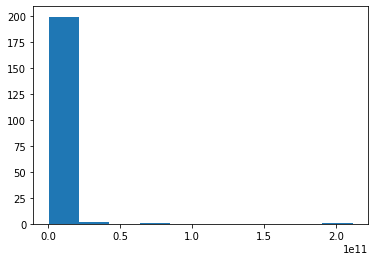

In [231]:
# Year1Before_Assets, Year1Before_Liabilities, Year1Before_CashAndCashEquivalentsAtCarryingValue
bankruptcy_df['Year1Before_Assets'].plot(kind='hist', xscale='log')
# Try Log Scale

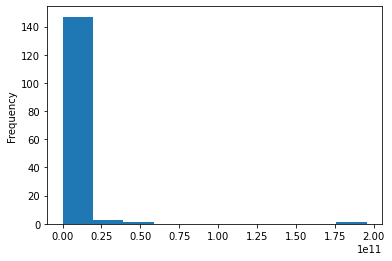

In [42]:
# Year1Before_Assets, Year1Before_Liabilities, Year1Before_CashAndCashEquivalentsAtCarryingValue
bankruptcy_df['Year1Before_Liabilities'].plot(kind='hist')

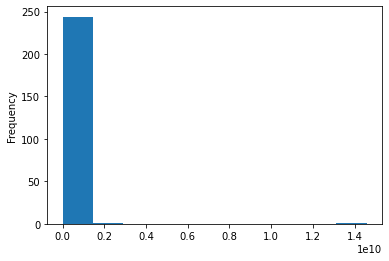

In [43]:
# Year1Before_Assets, Year1Before_Liabilities, Year1Before_CashAndCashEquivalentsAtCarryingValue
bankruptcy_df['Year1Before_CashAndCashEquivalentsAtCarryingValue'].plot(kind='hist')

## Need to either better bin, log scale, or otherwise make this look better

In [16]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year1Before_Revenues                                    146 non-null    float64
 1   Year1Before_NetIncomeLoss                               188 non-null    float64
 2   Year1Before_NetCashProvidedByUsedInOperatingActivities  158 non-null    float64
 3   Year1Before_NetCashProvidedByUsedInInvestingActivities  159 non-null    float64
 4   Year1Before_NetCashProvidedByUsedInFinancingActivities  157 non-null    float64
 5   Year1Before_CashAndCashEquivalentsAtCarryingValue       246 non-null    float64
 6   Year1Before_Assets                                      203 non-null    float64
 7   Year1Before_Liabilities                                 152 non-null    float64
 8   Year1Before_StockholdersEquity          

# Removing Nulls
Need to do so before any clustering data

1. Drop Rev year 1 Nulls
2. Drop Rev year 3 Nulls

In [24]:
# 1. Drop Rev Year 1 Nulls
shorter_bank_df = bankruptcy_df[bankruptcy_df['Year1Before_Revenues'].isnull()==False]

In [28]:
# 2. 
shorter_bank_df.isnull().sum()

shorter_bank_df[shorter_bank_df['Year3Before_Revenues'].isnull()==False].isnull().sum()

Year1Before_Revenues                                       0
Year1Before_NetIncomeLoss                                  3
Year1Before_NetCashProvidedByUsedInOperatingActivities    21
Year1Before_NetCashProvidedByUsedInInvestingActivities    20
Year1Before_NetCashProvidedByUsedInFinancingActivities    20
Year1Before_CashAndCashEquivalentsAtCarryingValue          0
Year1Before_Assets                                         0
Year1Before_Liabilities                                   29
Year1Before_StockholdersEquity                             6
Year2Before_Revenues                                       0
Year2Before_NetIncomeLoss                                  3
Year2Before_NetCashProvidedByUsedInOperatingActivities    21
Year2Before_NetCashProvidedByUsedInInvestingActivities    19
Year2Before_NetCashProvidedByUsedInFinancingActivities    19
Year2Before_CashAndCashEquivalentsAtCarryingValue          2
Year2Before_Assets                                         0
Year2Before_Liabilities 

In [33]:
shorter_bank_df[shorter_bank_df['Year1Before_NetIncomeLoss'].isnull()==True].T

,155,195,218
Year1Before_Revenues,7.40033e+08,4.28708e+09,1.40734e+09
Year1Before_NetIncomeLoss,NaN,NaN,NaN
Year1Before_NetCashProvidedByUsedInOperatingActivities,NaN,-2.83859e+08,NaN
Year1Before_NetCashProvidedByUsedInInvestingActivities,NaN,-1.651e+06,NaN
Year1Before_NetCashProvidedByUsedInFinancingActivities,NaN,4.07052e+08,NaN
Year1Before_CashAndCashEquivalentsAtCarryingValue,1.5247e+07,6.19644e+08,2.60818e+08
Year1Before_Assets,1.69995e+09,1.06395e+10,5.33136e+09
Year1Before_Liabilities,NaN,7.65267e+09,5.04978e+09
Year1Before_StockholdersEquity,NaN,2.9868e+09,2.81581e+08
Year2Before_Revenues,7.01654e+08,4.95351e+09,1.86063e+09


In [44]:
def hist_helper(df, column): 
    plt.figure()
    plt.hist(df[column])
    plt.axvline(df[column].mean(), label='Mean', c='red')
    plt.axvline(df[column].median(), label='Median', c='blue')
    plt.title(f'Histogram of {column}')
    plt.legend()
    plt.show()

/Users/markstansky/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/markstansky/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


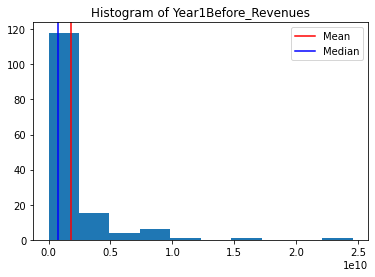

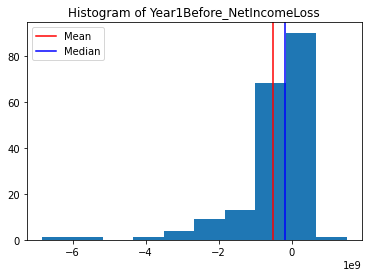

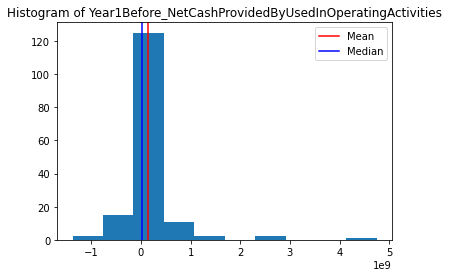

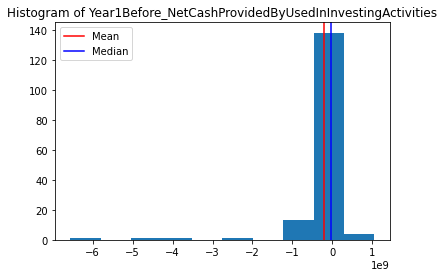

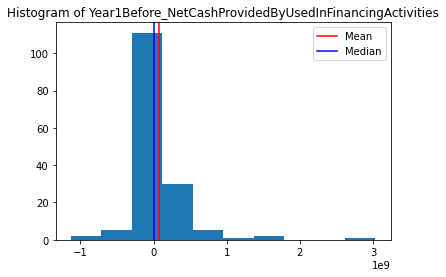

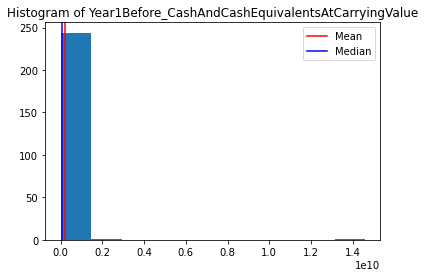

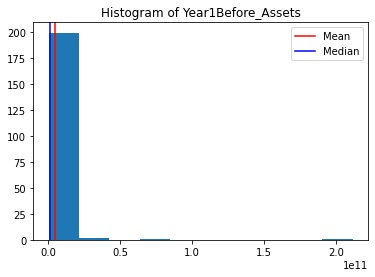

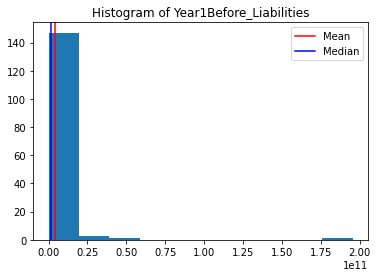

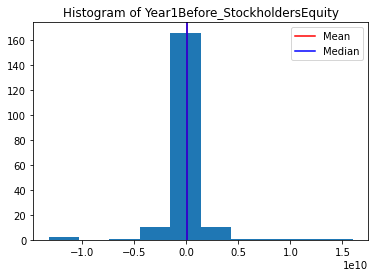

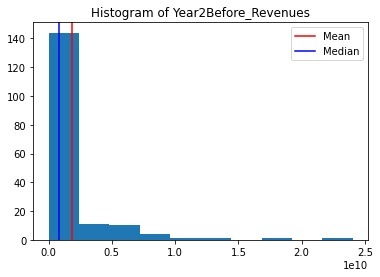

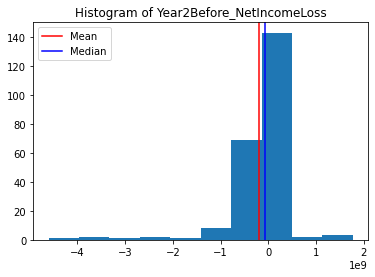

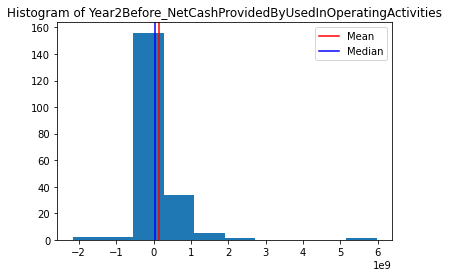

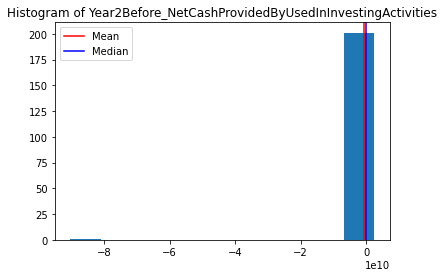

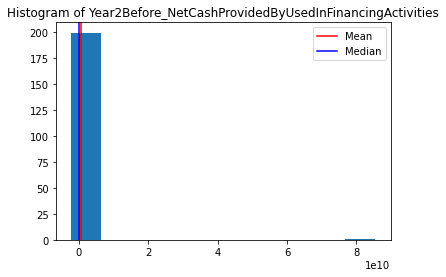

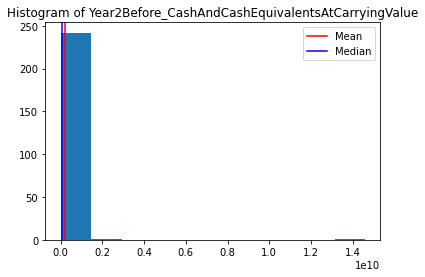

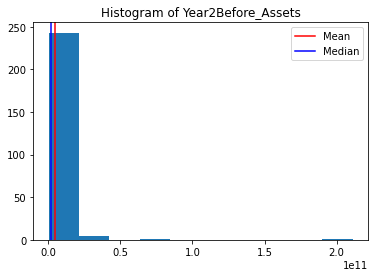

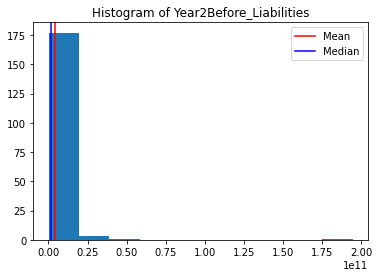

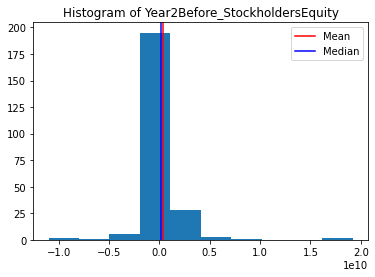

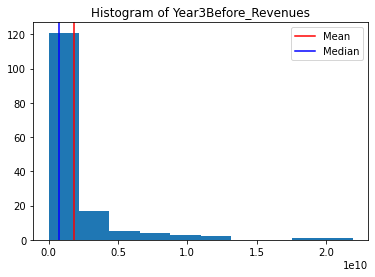

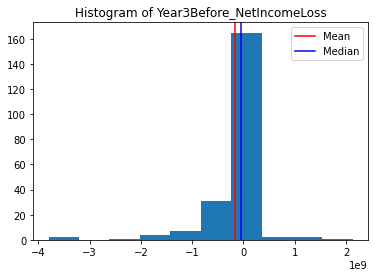

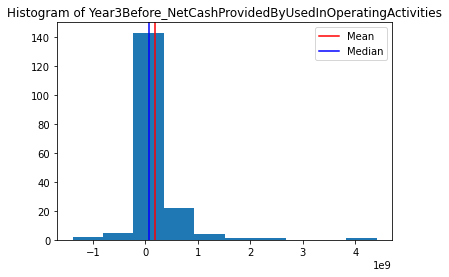

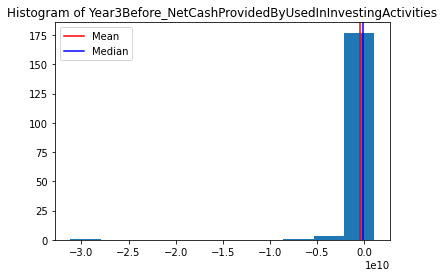

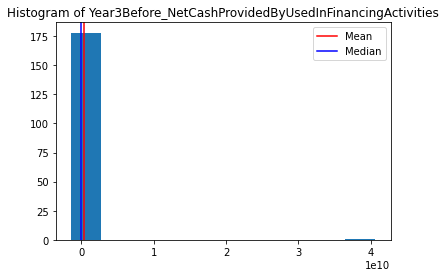

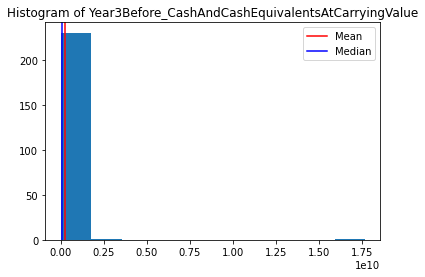

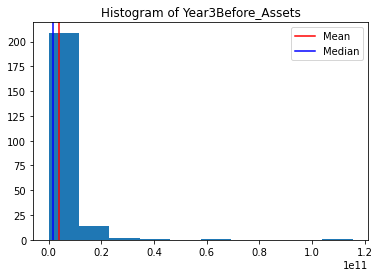

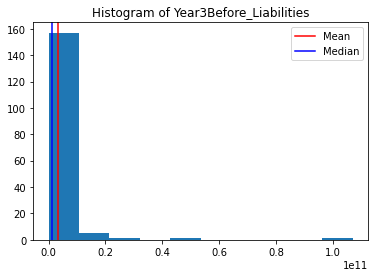

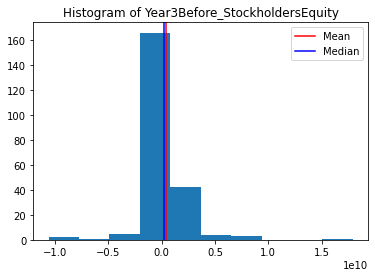

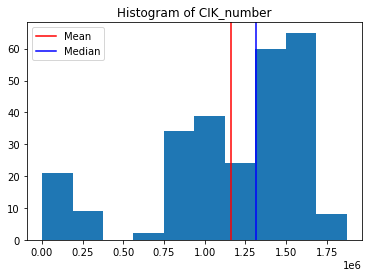

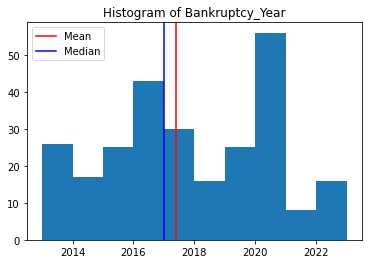

TypeError: 'value' must be an instance of str or bytes, not a float

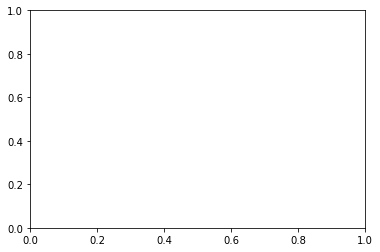

In [48]:
#investigate the distribution of the columns
for col in bankruptcy_df:
    hist_helper(bankruptcy_df, col)

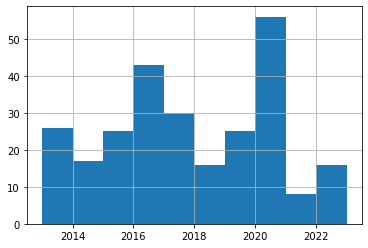

In [49]:
bankruptcy_df['Bankruptcy_Year'].hist()

# Drop nulls before clustering analysis
going to see how many nulls I can fill by taking Assets - Equity = Liabilities (my null)

In [146]:
bankruptcy_df.isnull().sum()

Year1Before_Revenues                                      116
Year1Before_NetIncomeLoss                                  74
Year1Before_NetCashProvidedByUsedInOperatingActivities    104
Year1Before_NetCashProvidedByUsedInInvestingActivities    103
Year1Before_NetCashProvidedByUsedInFinancingActivities    105
Year1Before_CashAndCashEquivalentsAtCarryingValue          16
Year1Before_Assets                                         59
Year1Before_Liabilities                                   110
Year1Before_StockholdersEquity                             69
Year2Before_Revenues                                       89
Year2Before_NetIncomeLoss                                  30
Year2Before_NetCashProvidedByUsedInOperatingActivities     61
Year2Before_NetCashProvidedByUsedInInvestingActivities     60
Year2Before_NetCashProvidedByUsedInFinancingActivities     62
Year2Before_CashAndCashEquivalentsAtCarryingValue          18
Year2Before_Assets                                         13
Year2Bef

# Cleaning up the DF

In [150]:
bankruptcy_df[['Year1Before_Liabilities','Year1Before_Assets','Year1Before_StockholdersEquity']].loc[bankruptcy_df['Year1Before_Liabilities'].isnull()==True]

,Year1Before_Liabilities,Year1Before_Assets,Year1Before_StockholdersEquity
3,NaN,NaN,NaN
4,NaN,NaN,NaN
12,NaN,8.767415e+09,-1.243986e+09
13,NaN,NaN,NaN
14,NaN,NaN,NaN
...,...,...,...
255,NaN,NaN,NaN
256,NaN,NaN,NaN
258,NaN,NaN,NaN
260,NaN,1.410000e+09,-4.610000e+08


In [153]:
# Year 1 Before
bankruptcy_df['Year1Before_Liabilities']=bankruptcy_df['Year1Before_Liabilities'].fillna(bankruptcy_df['Year1Before_Assets']-bankruptcy_df['Year1Before_StockholdersEquity'])

In [154]:
# Year 2 Before
bankruptcy_df['Year2Before_Liabilities']=bankruptcy_df['Year2Before_Liabilities'].fillna(bankruptcy_df['Year2Before_Assets']-bankruptcy_df['Year2Before_StockholdersEquity'])

In [155]:
# Year 3 Before
bankruptcy_df['Year3Before_Liabilities']=bankruptcy_df['Year3Before_Liabilities'].fillna(bankruptcy_df['Year3Before_Assets']-bankruptcy_df['Year3Before_StockholdersEquity'])

In [156]:
bankruptcy_df.isnull().sum()

Year1Before_Revenues                                      116
Year1Before_NetIncomeLoss                                  74
Year1Before_NetCashProvidedByUsedInOperatingActivities    104
Year1Before_NetCashProvidedByUsedInInvestingActivities    103
Year1Before_NetCashProvidedByUsedInFinancingActivities    105
Year1Before_CashAndCashEquivalentsAtCarryingValue          16
Year1Before_Assets                                         59
Year1Before_Liabilities                                    62
Year1Before_StockholdersEquity                             69
Year2Before_Revenues                                       89
Year2Before_NetIncomeLoss                                  30
Year2Before_NetCashProvidedByUsedInOperatingActivities     61
Year2Before_NetCashProvidedByUsedInInvestingActivities     60
Year2Before_NetCashProvidedByUsedInFinancingActivities     62
Year2Before_CashAndCashEquivalentsAtCarryingValue          18
Year2Before_Assets                                         13
Year2Bef

# Clustering Analysis

In [158]:
bankruptcy_df.notnull().all(1).sum()

86

In [159]:
clustering_df = bankruptcy_df[bankruptcy_df.notnull().all(1)==True].copy()
clustering_df

,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,Year1Before_StockholdersEquity,Year2Before_Revenues,...,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity,CIK_number,Bankruptcy_Year,entity.name,report.sic-code,report.filing-date
0,1.503000e+09,1.509000e+09,2.864000e+09,-3.638000e+09,-9000000.0,1.458600e+10,2.117930e+11,1.954980e+11,1.600400e+10,1.314000e+09,...,4.065600e+10,1.767500e+10,1.155110e+11,1.070780e+11,8.220000e+09,719739,2023,SVB FINANCIAL GROUP,6022.0,2023-02-24
1,7.867778e+09,-5.596230e+08,1.785400e+07,-3.491820e+08,-606018000.0,1.352984e+09,5.130572e+09,4.956427e+09,1.741450e+08,9.233028e+09,...,-1.828460e+08,1.000340e+09,7.790515e+09,6.025580e+09,1.764935e+09,886158,2023,BED BATH & BEYOND INC.,5700.0,2023-06-14
2,2.490000e+09,-2.096000e+09,3.120000e+08,-1.080000e+08,406000000.0,4.980000e+08,4.073000e+09,5.350000e+09,-1.302000e+09,2.973000e+09,...,-4.890000e+08,7.270000e+08,6.231000e+09,5.867000e+09,2.360000e+08,1418100,2023,AVAYA HOLDINGS CORP.,7372.0,2023-09-08
6,3.245000e+09,-2.300000e+09,-7.000000e+08,-2.940000e+08,397000000.0,9.240000e+08,1.786300e+10,2.131800e+10,-3.670000e+09,2.570000e+09,...,-4.700000e+07,8.000000e+08,2.535633e+10,2.498192e+10,-7.673785e+09,1813756,2023,WEWORK INC.,6512.0,2023-03-29
10,6.499000e+08,-5.300000e+07,-7.030000e+07,4.480000e+07,21500000.0,1.370000e+07,5.170000e+08,3.178000e+08,1.992000e+08,5.848000e+08,...,-1.111000e+08,2.710000e+07,5.022000e+08,2.339000e+08,2.730000e+08,1655075,2022,"ARMSTRONG FLOORING, INC.",3089.0,2022-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,2.886590e+08,-1.535140e+08,5.816000e+07,-6.066900e+07,-1950000.0,2.335900e+07,3.929070e+08,4.262360e+08,-3.332900e+07,3.394290e+08,...,5.813100e+07,2.152500e+07,5.063730e+08,3.928110e+08,1.135620e+08,1311486,2014,Global Geophysical Services Inc,1382.0,2013-03-05
232,4.711567e+09,-1.649599e+09,-1.924510e+08,-1.776120e+08,776591000.0,1.364953e+09,8.679954e+09,8.324567e+09,3.553870e+08,5.693235e+09,...,5.250030e+08,2.282155e+09,9.822136e+09,6.684054e+09,3.138082e+09,1037016,2014,NII HOLDINGS INC,4812.0,2015-03-10
235,1.307500e+09,-1.589000e+08,8.120000e+07,2.570000e+07,-85600000.0,2.929000e+08,1.705500e+09,2.163700e+09,-4.582000e+08,1.862100e+09,...,-6.500000e+06,3.760000e+07,3.549300e+09,2.796900e+09,7.524000e+08,1065059,2014,USEC INC,1400.0,2014-03-31
238,1.452813e+08,1.120051e+07,2.967880e+07,-2.016758e+07,-8091334.0,9.622883e+06,2.885008e+08,8.425985e+07,2.042410e+08,1.242215e+08,...,1.842900e+07,1.004625e+07,2.474486e+08,7.740126e+07,1.700473e+08,1120830,2013,"CHINA NATURAL GAS, INC.",4923.0,2012-04-09


### Looking at correlation of the columns in this df

In [160]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 244
Data columns (total 32 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year1Before_Revenues                                    86 non-null     float64
 1   Year1Before_NetIncomeLoss                               86 non-null     float64
 2   Year1Before_NetCashProvidedByUsedInOperatingActivities  86 non-null     float64
 3   Year1Before_NetCashProvidedByUsedInInvestingActivities  86 non-null     float64
 4   Year1Before_NetCashProvidedByUsedInFinancingActivities  86 non-null     float64
 5   Year1Before_CashAndCashEquivalentsAtCarryingValue       86 non-null     float64
 6   Year1Before_Assets                                      86 non-null     float64
 7   Year1Before_Liabilities                                 86 non-null     float64
 8   Year1Before_StockholdersEquity           

In [161]:
clustering_df['report.sic-code'] = clustering_df['report.sic-code'].astype(str)

In [162]:
# Setting index as sic number so it is not considered during the correlation analysis
clustering_df.set_index('CIK_number',inplace=True)

In [163]:
# dropping non-numeric fields
clustering_df.drop(['Bankruptcy_Year','entity.name','report.sic-code','report.filing-date'],axis=1,inplace=True)

In [164]:
new_corr_df = clustering_df.corr()
mask = np.triu(new_corr_df)

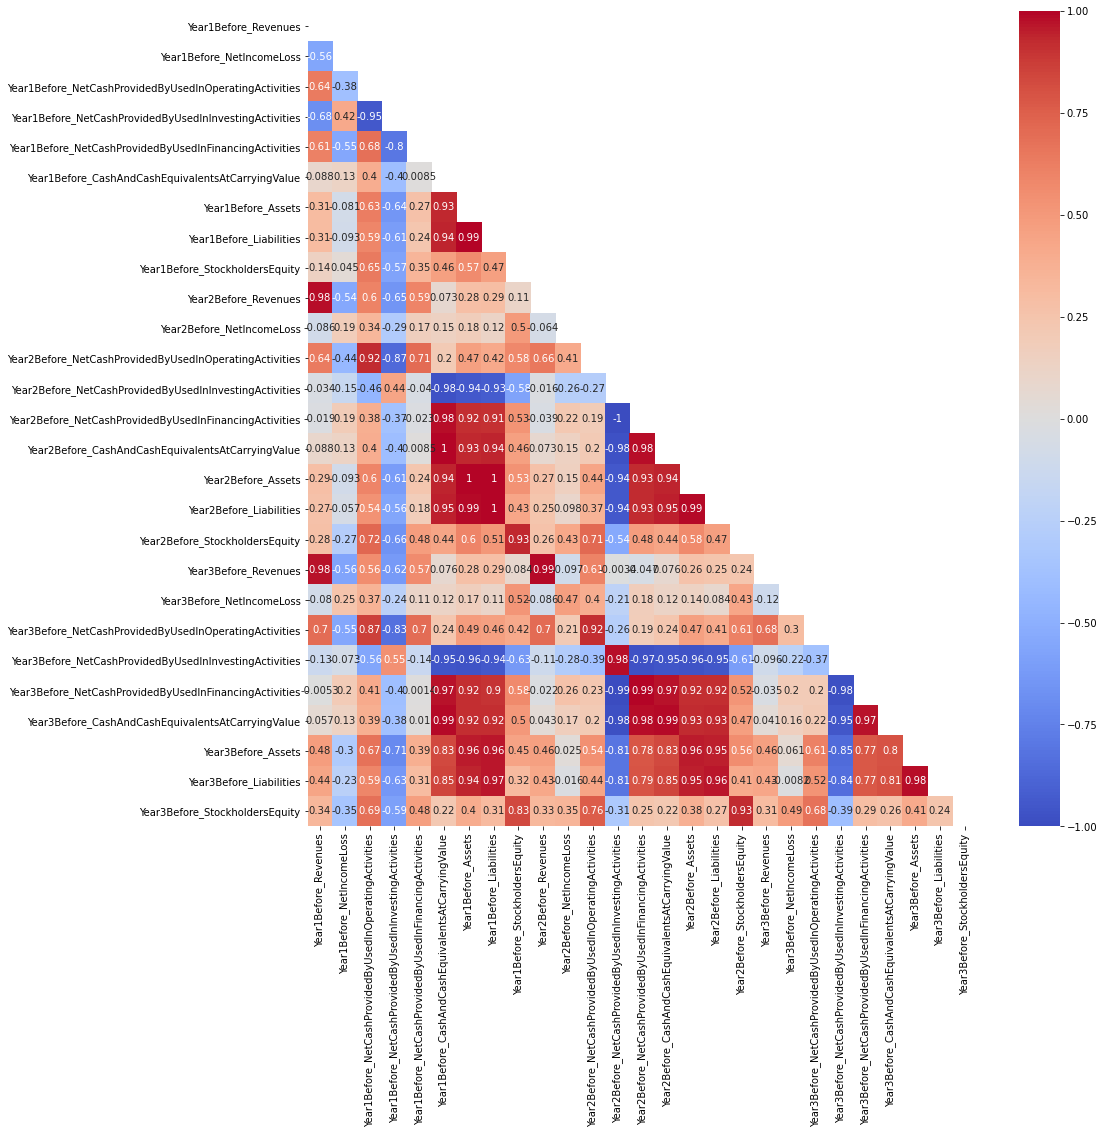

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(new_corr_df, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask) #annot is annotation
plt.show()

As expected, there is quite a bit of correlation in this dataframe.  My dimensionality reduction techniques should automatically address this, however.

In [166]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [167]:
ms = MinMaxScaler()
ss = StandardScaler()

df_m = ms.fit_transform(clustering_df)
df_s = ss.fit_transform(clustering_df)

In [168]:
# Return our min and max scalers to dataframes
df_m = pd.DataFrame(df_m, columns=clustering_df.columns, index = clustering_df.index)
df_s = pd.DataFrame(df_s, columns=clustering_df.columns, index = clustering_df.index)

In [169]:
#We want to reduce the dimensions of our datasets in order to plot the principle components against one another
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE #TSNE is t-stochastic neighbor embeddings
from umap.umap_ import UMAP

In [170]:
#we will create 6 different transformations based on 3 dimensionality reductions and 2 scalings

#PCA + MIN MAX
pca_m = PCA(n_components=3)
df_m_pca = pca_m.fit_transform(df_m)

#PCA + STANDARD
pca_s = PCA(n_components=3)
df_s_pca = pca_s.fit_transform(df_s)

#TSNE + MIN MAX
tsne_m = TSNE(n_components = 3, perplexity = 15) #perplexity is a parameter 
df_m_tsne = tsne_m.fit_transform(df_m)

#TSNE + STANDARD
tsne_s = TSNE(n_components = 3, perplexity = 15) #perplexity is a parameter 
df_s_tsne = tsne_s.fit_transform(df_s)

#UMAP + MINMAX
umapM = UMAP(n_neighbors=10, n_components=3).fit_transform(df_m)

#UMAP + STANDARD
umapS = UMAP(n_neighbors=10, n_components=3).fit_transform(df_s)

In [171]:
df_umapM = pd.DataFrame(umapM, index=clustering_df.index)
df_umapS = pd.DataFrame(umapS, index=clustering_df.index)

Now that I have my 6 dimensionally reduced dataframes, it's time to look at how they are scattered

In [172]:
df_m_pca = pd.DataFrame(df_m_pca, index=clustering_df.index)
df_s_pca = pd.DataFrame(df_s_pca, index=clustering_df.index)

In [173]:
df_m_pca

,0,1,2
CIK_number,,,
719739,3.072976,1.991665,0.133189
886158,0.258556,-0.435822,0.242066
1418100,0.003947,-0.114829,0.062998
1813756,-0.060035,-0.034673,0.960536
1655075,-0.194593,0.106087,-0.076069
...,...,...,...
1311486,-0.185564,0.113986,-0.098329
1037016,0.242467,-0.265430,0.066592
1065059,-0.140187,0.032951,0.080056


<Figure size 432x288 with 0 Axes>

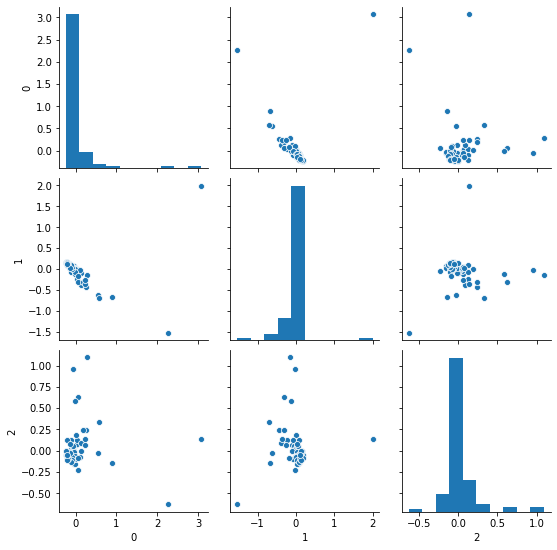

In [174]:
#PCA MINMAX
plt.figure()
sns.pairplot(df_m_pca)
plt.show()

<Figure size 432x288 with 0 Axes>

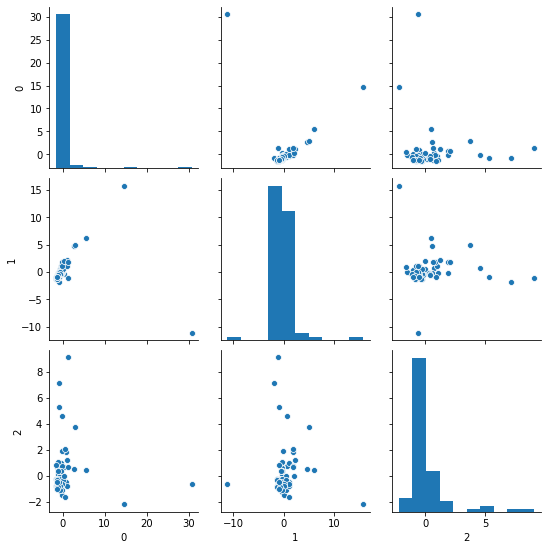

In [175]:
#PCA STANDARD
plt.figure()
sns.pairplot(df_s_pca)
plt.show()

In [176]:
df_m_tsne = pd.DataFrame(df_m_tsne, index=clustering_df.index)
df_s_tsne = pd.DataFrame(df_s_tsne, index=clustering_df.index)

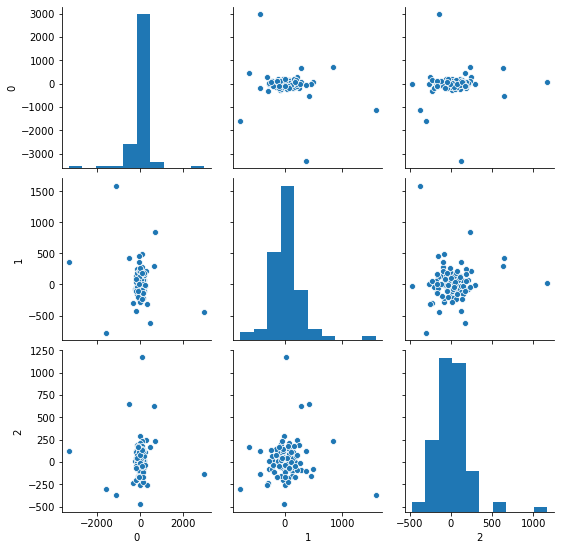

In [177]:
#TSNE MINMAX
sns.pairplot(df_m_tsne)

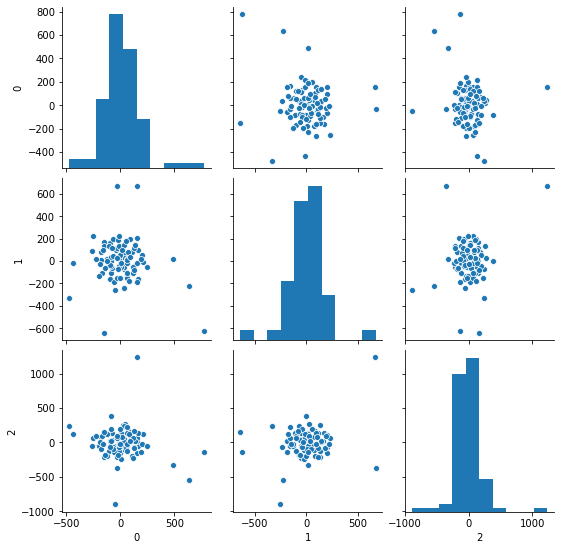

In [178]:
#TSNE STANDARD
sns.pairplot(df_s_tsne)

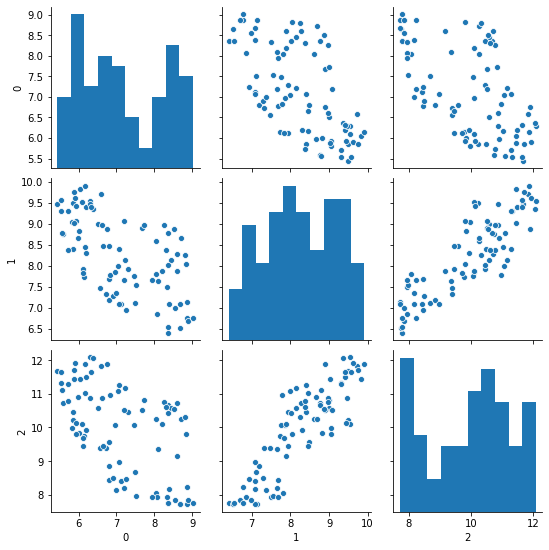

In [179]:
#UMAP MINMAX
sns.pairplot(df_umapM)

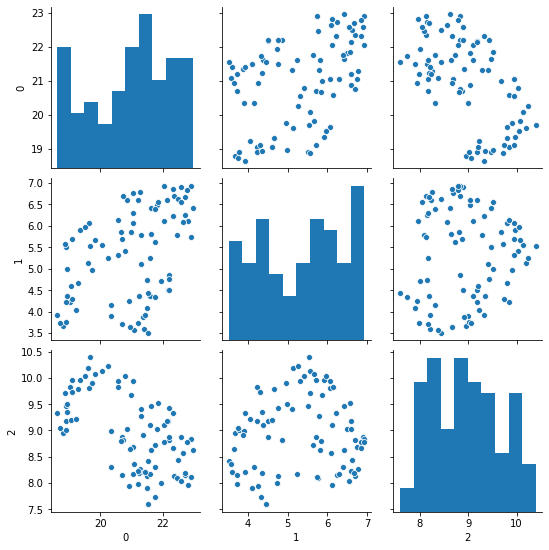

In [180]:
#UMAP STANDARD
sns.pairplot(df_umapS)

# Looking at 3d plots of the techniques to see whcih is most separable

In [181]:
from mpl_toolkits.mplot3d import axes3d  

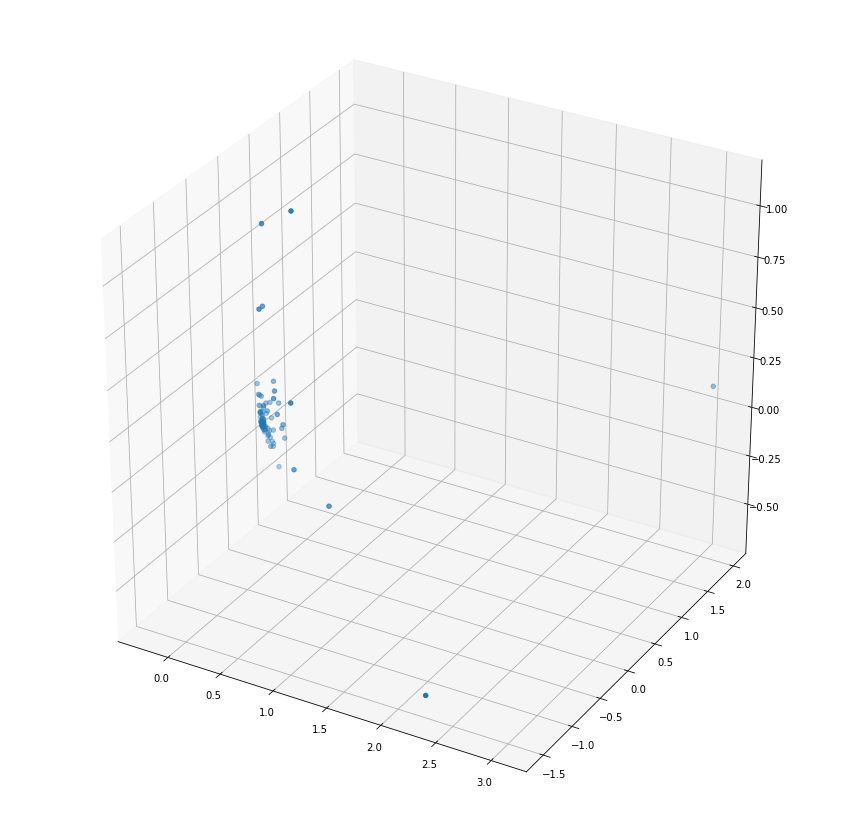

In [182]:
#PCA Minmax

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_m_pca[0],df_m_pca[1],df_m_pca[2])
plt.show()

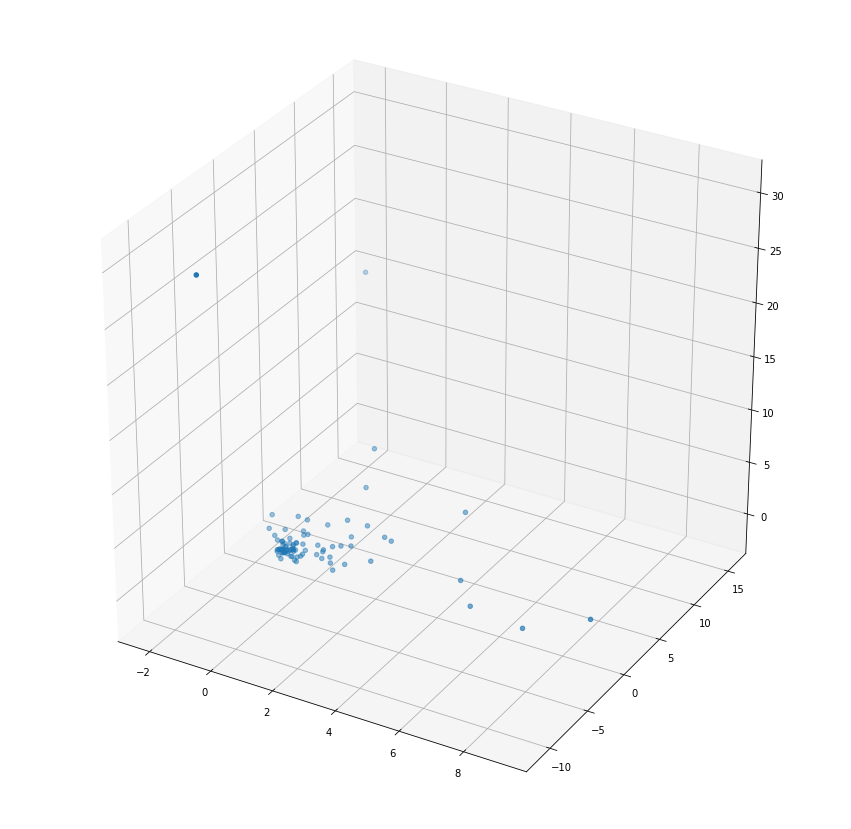

In [183]:
#PCA Standard
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_s_pca[2],df_s_pca[1],df_s_pca[0])
plt.show()

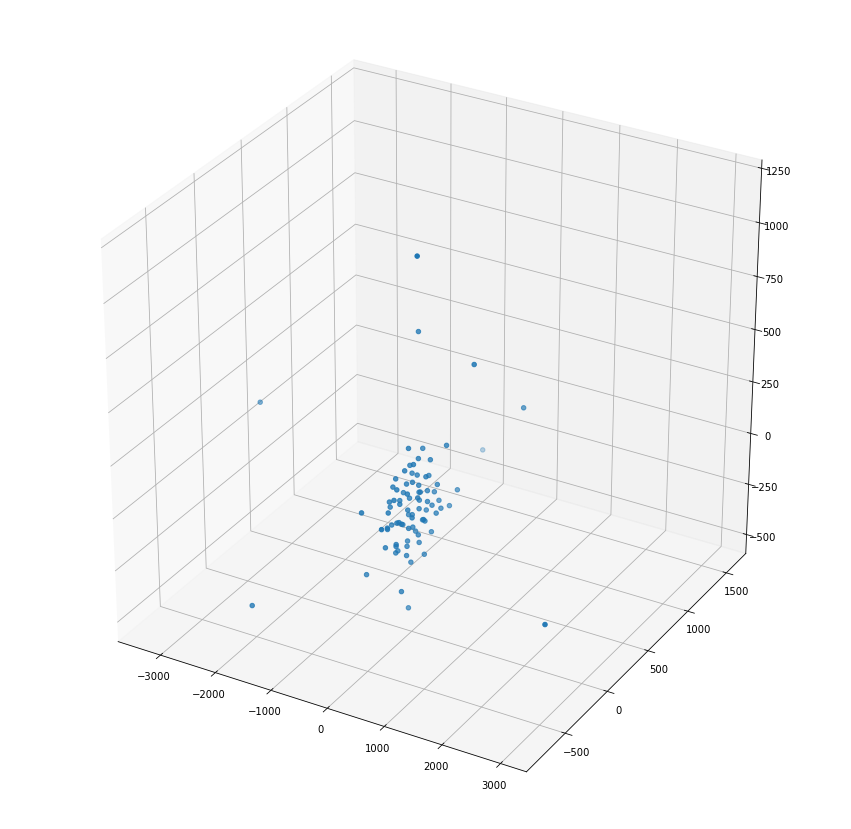

In [184]:
#TSNE M


plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_m_tsne[0],df_m_tsne[1],df_m_tsne[2])
plt.show()

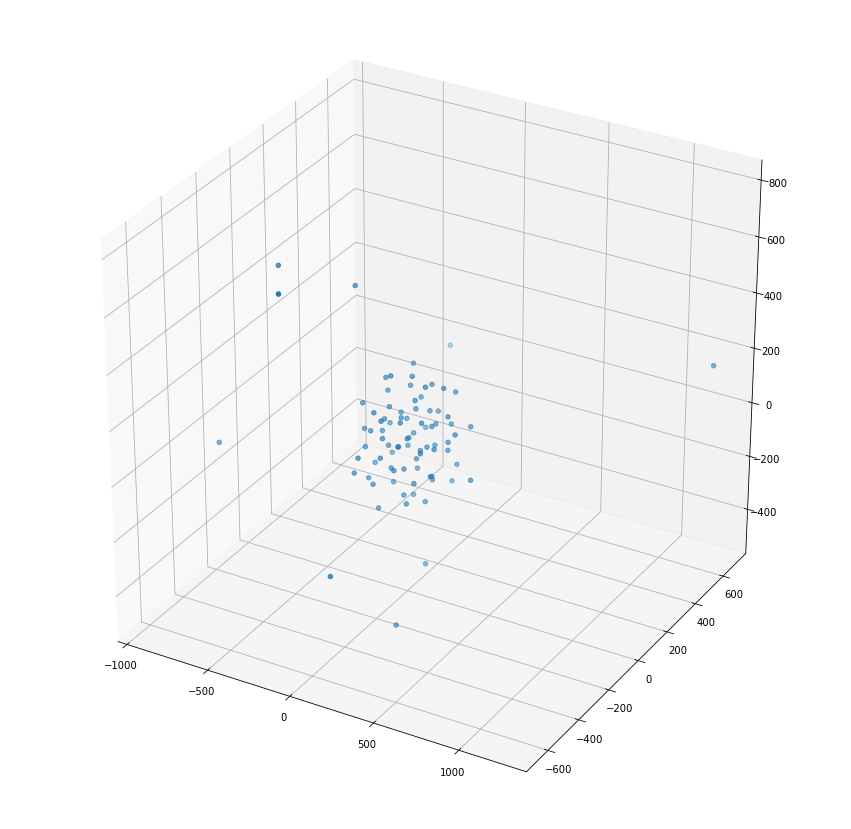

In [185]:
#TSNE S

plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_s_tsne[2],df_s_tsne[1],df_s_tsne[0])
plt.show()


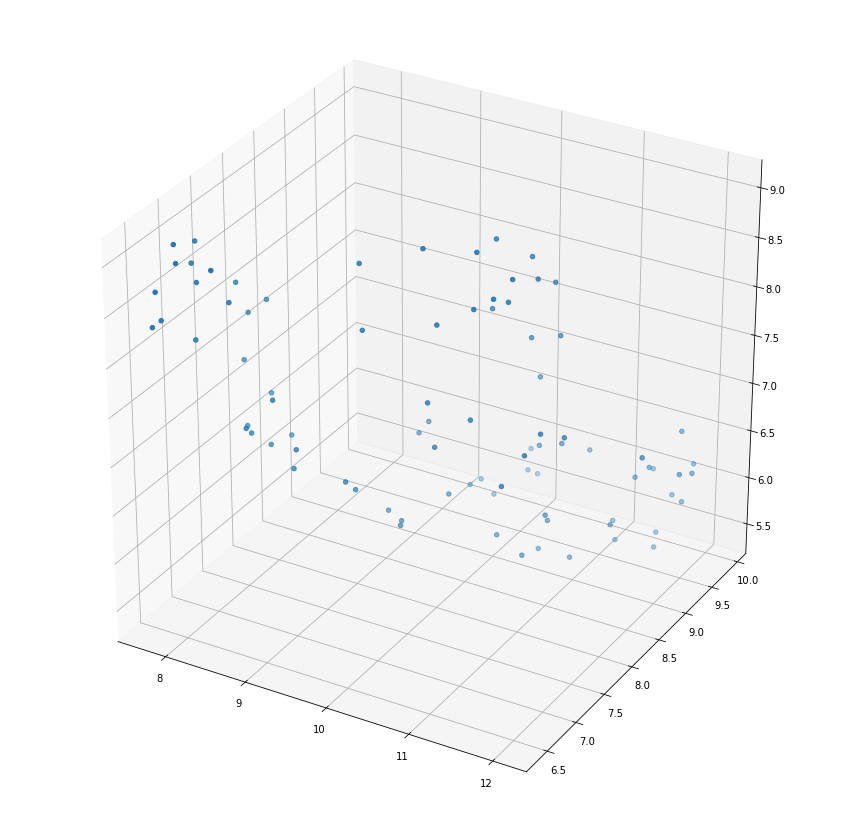

In [186]:
#UMAP M


plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_umapM[2],df_umapM[1],df_umapM[0])
plt.show()

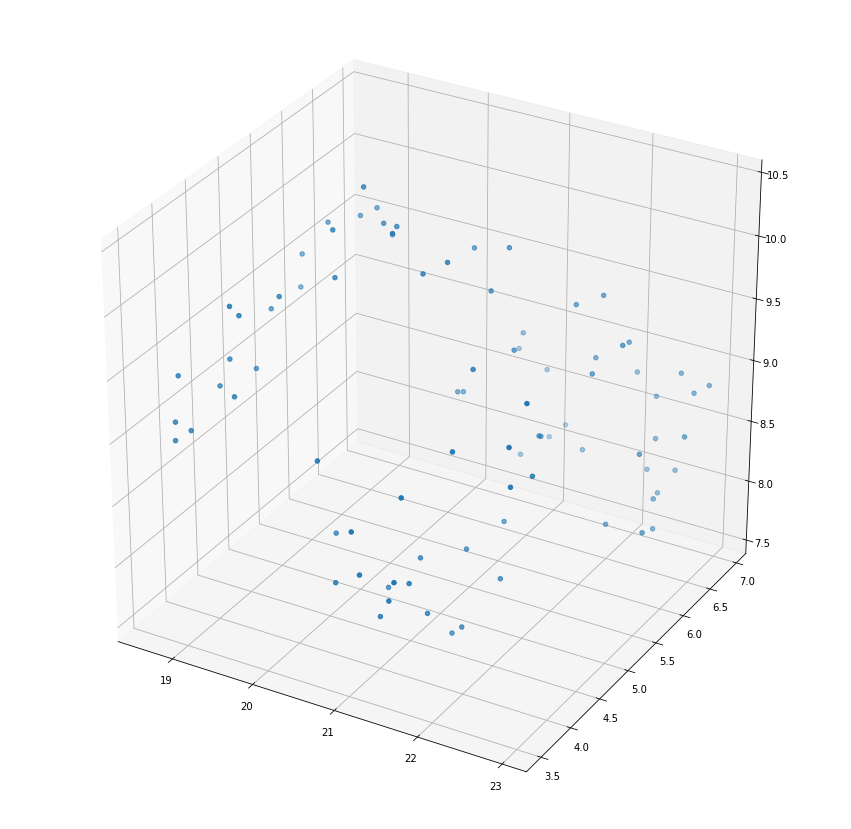

In [187]:
#UMAP S


plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.scatter(df_umapS[0],df_umapS[1],df_umapS[2])
plt.show()

## Now for the actual clustering

In [188]:
cluster_df = pd.DataFrame(df_umapS, index=clustering_df.index)

In [189]:
cluster_df.head()

,0,1,2
CIK_number,,,
719739,18.794256,3.658300,8.955968
886158,19.035463,4.232980,9.832874
1418100,20.358034,4.152113,8.301551
1813756,18.899933,5.512568,9.469200
1655075,21.833841,6.488802,9.036399


In [190]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [191]:
#calulate the best value of K for kmeans clustering 

ks = np.arange(2,20,1) 

inertia = [] #inertia is the sum of the squared distance between each point and its centroid
sil_scores = [] #Silhouette score is metric of inter vs intra cluster distance 

for k in ks: #looping through different numbers of clusters
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(cluster_df)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(cluster_df, kmeans.labels_))

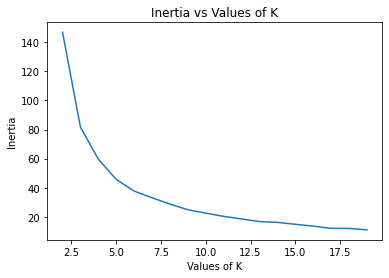

In [192]:
#plot the inertia to find best value of K

plt.figure()
plt.plot(ks, inertia)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Inertia vs Values of K')
plt.show()

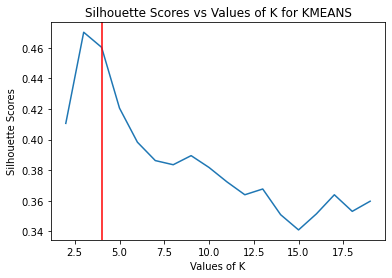

In [193]:
#plot the silhouette scores as well

plt.figure()
plt.plot(ks, sil_scores)
plt.axvline(4, color='red') #drawing a vertical line at 4
plt.xlabel('Values of K')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores vs Values of K for KMEANS')
plt.show()

In [194]:
from sklearn.cluster import AgglomerativeClustering

In [195]:
ks = np.arange(2,20,1) 

#inertia = [] #inertia is the sum of the squared distance between each point and its centroid
sil_scores_agg = [] #Silhouette score is metric of inter vs intra cluster distance 

for k in ks: #looping through different numbers of clusters
    agglom = AgglomerativeClustering(n_clusters=k)
    agglom.fit(cluster_df)
    #inertia.append(agglom.inertia_)
    sil_scores_agg.append(silhouette_score(cluster_df, agglom.labels_))

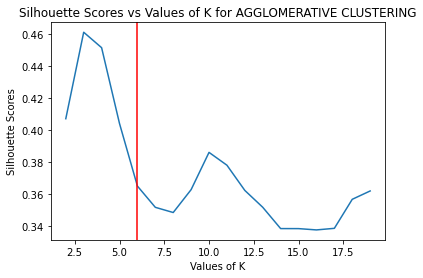

In [196]:
#plot the silhouette scores for AGGLOMERATIVE as well

plt.figure()
plt.plot(ks, sil_scores_agg)
plt.axvline(6, color='red')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores vs Values of K for AGGLOMERATIVE CLUSTERING')
plt.show()

# K=4 seems to be the most reasonable value

In [197]:
#let's fit our final and most optimal clustering to our data

final_kmeans = KMeans(n_clusters=4)
final_kmeans.fit(cluster_df)

KMeans(n_clusters=4)

In [198]:
final_kmeans.labels_ #our labels are 0,1,2, and 3

array([1, 1, 3, 2, 0, 0, 2, 2, 3, 0, 0, 0, 3, 0, 1, 2, 3, 0, 1, 3, 3, 3,
       3, 1, 2, 2, 0, 2, 3, 1, 2, 0, 2, 0, 0, 0, 2, 3, 0, 0, 0, 3, 3, 1,
       3, 0, 2, 3, 3, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 0, 0, 3, 3, 3,
       3, 3, 2, 3, 1, 3, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0, 1, 2, 0, 0],
      dtype=int32)

In [199]:
final_kmeans.labels_.shape

(86,)

In [200]:
cluster_df.shape

(86, 3)

In [201]:
#creating a new column in dataframe for the cluster labels
cluster_df['kmeans'] = final_kmeans.labels_

In [202]:
cluster_df.head()

,0,1,2,kmeans
CIK_number,,,,
719739,18.794256,3.658300,8.955968,1
886158,19.035463,4.232980,9.832874,1
1418100,20.358034,4.152113,8.301551,3
1813756,18.899933,5.512568,9.469200,2
1655075,21.833841,6.488802,9.036399,0


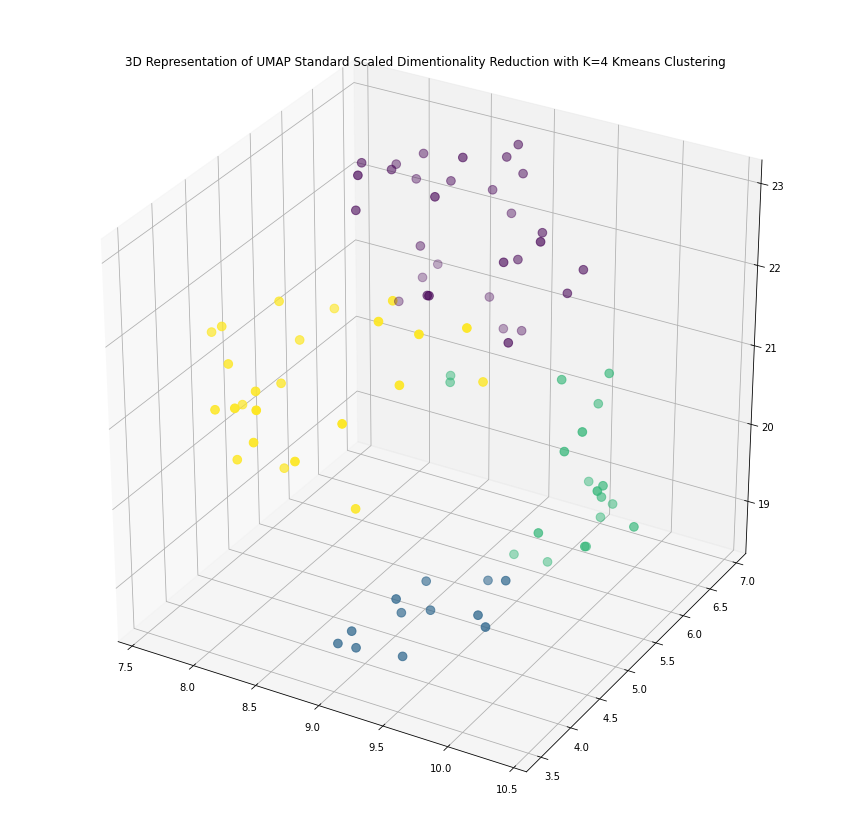

In [243]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
    
ax.scatter(cluster_df[2], cluster_df[1], cluster_df[0], c=cluster_df['kmeans'],s=75)  #color according to the label
plt.title('3D Representation of UMAP Standard Scaled Dimentionality Reduction with K=4 Kmeans Clustering')
#plt.legend()
plt.show()

# let's also look at agglomerative clustering just for fun

In [204]:
agglom = AgglomerativeClustering(n_clusters=6)
agglom.fit(cluster_df.drop(columns='kmeans'))

AgglomerativeClustering(n_clusters=6)

In [205]:
cluster_df_agg = cluster_df.copy()

In [206]:
cluster_df_agg['agglom']= agglom.labels_

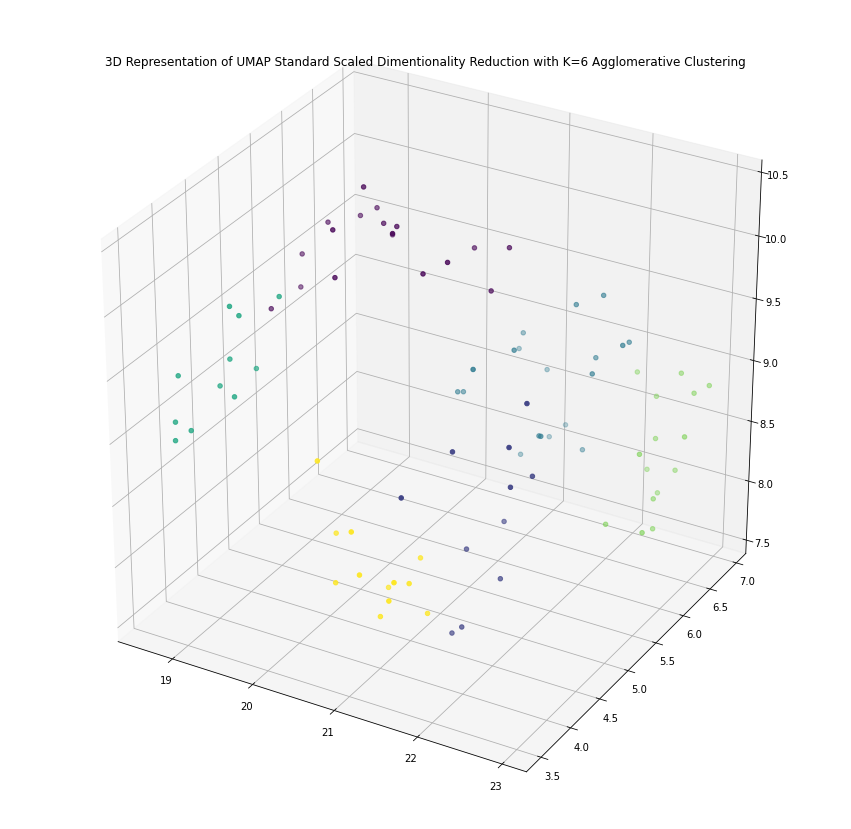

In [207]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')
    
ax.scatter(cluster_df_agg[0], cluster_df_agg[1], cluster_df_agg[2], c=cluster_df_agg['agglom'])  #color according to the label
plt.title('3D Representation of UMAP Standard Scaled Dimentionality Reduction with K=6 Agglomerative Clustering')
    
plt.show()

In [208]:
clustering_df.head()

,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,Year1Before_StockholdersEquity,Year2Before_Revenues,...,Year2Before_StockholdersEquity,Year3Before_Revenues,Year3Before_NetIncomeLoss,Year3Before_NetCashProvidedByUsedInOperatingActivities,Year3Before_NetCashProvidedByUsedInInvestingActivities,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity
CIK_number,,,,,,,,,,,,,,,,,,,,,
719739,1.503000e+09,1.509000e+09,2.864000e+09,-3.638000e+09,-9000000.0,1.458600e+10,2.117930e+11,1.954980e+11,1.600400e+10,1.314000e+09,...,1.623600e+10,1.057000e+09,1.191000e+09,1.412000e+09,-3.120600e+10,4.065600e+10,1.767500e+10,1.155110e+11,1.070780e+11,8.220000e+09
886158,7.867778e+09,-5.596230e+08,1.785400e+07,-3.491820e+08,-606018000.0,1.352984e+09,5.130572e+09,4.956427e+09,1.741450e+08,9.233028e+09,...,1.276936e+09,1.115858e+10,-6.138160e+08,5.909410e+08,9.137600e+07,-1.828460e+08,1.000340e+09,7.790515e+09,6.025580e+09,1.764935e+09
1418100,2.490000e+09,-2.096000e+09,3.120000e+08,-1.080000e+08,406000000.0,4.980000e+08,4.073000e+09,5.350000e+09,-1.302000e+09,2.973000e+09,...,3.920000e+08,2.873000e+09,-6.800000e+08,1.470000e+08,3.140000e+08,-4.890000e+08,7.270000e+08,6.231000e+09,5.867000e+09,2.360000e+08
1813756,3.245000e+09,-2.300000e+09,-7.000000e+08,-2.940000e+08,397000000.0,9.240000e+08,1.786300e+10,2.131800e+10,-3.670000e+09,2.570000e+09,...,-1.882000e+09,3.416000e+09,-3.800000e+09,-9.000000e+08,-4.440000e+08,-4.700000e+07,8.000000e+08,2.535633e+10,2.498192e+10,-7.673785e+09
1655075,6.499000e+08,-5.300000e+07,-7.030000e+07,4.480000e+07,21500000.0,1.370000e+07,5.170000e+08,3.178000e+08,1.992000e+08,5.848000e+08,...,2.278000e+08,6.263000e+08,-5.680000e+07,-6.000000e+06,-2.940000e+07,-1.111000e+08,2.710000e+07,5.022000e+08,2.339000e+08,2.730000e+08


In [209]:
clustering_df['cluster_label'] = cluster_df['kmeans']

In [210]:
clustering_df

,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,Year1Before_StockholdersEquity,Year2Before_Revenues,...,Year3Before_Revenues,Year3Before_NetIncomeLoss,Year3Before_NetCashProvidedByUsedInOperatingActivities,Year3Before_NetCashProvidedByUsedInInvestingActivities,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity,cluster_label
CIK_number,,,,,,,,,,,,,,,,,,,,,
719739,1.503000e+09,1.509000e+09,2.864000e+09,-3.638000e+09,-9000000.0,1.458600e+10,2.117930e+11,1.954980e+11,1.600400e+10,1.314000e+09,...,1.057000e+09,1.191000e+09,1.412000e+09,-3.120600e+10,4.065600e+10,1.767500e+10,1.155110e+11,1.070780e+11,8.220000e+09,1
886158,7.867778e+09,-5.596230e+08,1.785400e+07,-3.491820e+08,-606018000.0,1.352984e+09,5.130572e+09,4.956427e+09,1.741450e+08,9.233028e+09,...,1.115858e+10,-6.138160e+08,5.909410e+08,9.137600e+07,-1.828460e+08,1.000340e+09,7.790515e+09,6.025580e+09,1.764935e+09,1
1418100,2.490000e+09,-2.096000e+09,3.120000e+08,-1.080000e+08,406000000.0,4.980000e+08,4.073000e+09,5.350000e+09,-1.302000e+09,2.973000e+09,...,2.873000e+09,-6.800000e+08,1.470000e+08,3.140000e+08,-4.890000e+08,7.270000e+08,6.231000e+09,5.867000e+09,2.360000e+08,3
1813756,3.245000e+09,-2.300000e+09,-7.000000e+08,-2.940000e+08,397000000.0,9.240000e+08,1.786300e+10,2.131800e+10,-3.670000e+09,2.570000e+09,...,3.416000e+09,-3.800000e+09,-9.000000e+08,-4.440000e+08,-4.700000e+07,8.000000e+08,2.535633e+10,2.498192e+10,-7.673785e+09,2
1655075,6.499000e+08,-5.300000e+07,-7.030000e+07,4.480000e+07,21500000.0,1.370000e+07,5.170000e+08,3.178000e+08,1.992000e+08,5.848000e+08,...,6.263000e+08,-5.680000e+07,-6.000000e+06,-2.940000e+07,-1.111000e+08,2.710000e+07,5.022000e+08,2.339000e+08,2.730000e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311486,2.886590e+08,-1.535140e+08,5.816000e+07,-6.066900e+07,-1950000.0,2.335900e+07,3.929070e+08,4.262360e+08,-3.332900e+07,3.394290e+08,...,3.848090e+08,4.933000e+06,1.351010e+08,-1.999440e+08,5.813100e+07,2.152500e+07,5.063730e+08,3.928110e+08,1.135620e+08,0
1037016,4.711567e+09,-1.649599e+09,-1.924510e+08,-1.776120e+08,776591000.0,1.364953e+09,8.679954e+09,8.324567e+09,3.553870e+08,5.693235e+09,...,6.380817e+09,2.251960e+08,9.823910e+08,-9.102830e+08,5.250030e+08,2.282155e+09,9.822136e+09,6.684054e+09,3.138082e+09,1
1065059,1.307500e+09,-1.589000e+08,8.120000e+07,2.570000e+07,-85600000.0,2.929000e+08,1.705500e+09,2.163700e+09,-4.582000e+08,1.862100e+09,...,1.600800e+09,-4.911000e+08,5.630000e+07,-1.632000e+08,-6.500000e+06,3.760000e+07,3.549300e+09,2.796900e+09,7.524000e+08,2


In [237]:
clustering_df[clustering_df['CIK_number']==1813756]

,index,CIK_number,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,...,Year3Before_NetIncomeLoss,Year3Before_NetCashProvidedByUsedInOperatingActivities,Year3Before_NetCashProvidedByUsedInInvestingActivities,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity,cluster_label,entity.name
3,3,1813756,3.245000e+09,-2.300000e+09,-700000000.0,-294000000.0,397000000.0,924000000.0,1.786300e+10,2.131800e+10,...,-3.800000e+09,-900000000.0,-444000000.0,-47000000.0,800000000.0,2.535633e+10,2.498192e+10,-7.673785e+09,2,WEWORK INC.


# Interpereting the clusters

In [211]:
kmeans_features = clustering_df.groupby('cluster_label').mean().T
kmeans_features

cluster_label,0,1,2,3
Year1Before_Revenues,4.303206e+08,7.234636e+09,2.331052e+09,9.468466e+08
Year1Before_NetIncomeLoss,-1.381362e+08,-1.691818e+09,-4.233979e+08,-1.069884e+09
Year1Before_NetCashProvidedByUsedInOperatingActivities,1.277248e+07,1.200264e+09,3.627632e+06,2.425490e+08
Year1Before_NetCashProvidedByUsedInInvestingActivities,-1.362450e+07,-1.627626e+09,-5.525342e+07,-2.474281e+08
Year1Before_NetCashProvidedByUsedInFinancingActivities,-9.658527e+06,4.846832e+08,2.554595e+07,8.962396e+07
Year1Before_CashAndCashEquivalentsAtCarryingValue,7.563661e+07,1.703254e+09,4.223126e+08,1.269564e+08
Year1Before_Assets,9.157656e+08,3.299238e+10,5.981319e+09,3.483310e+09
Year1Before_Liabilities,9.052038e+08,3.054498e+10,8.280781e+09,3.204361e+09
Year1Before_StockholdersEquity,-2.500436e+07,2.404108e+09,-2.321614e+09,2.293975e+08
Year2Before_Revenues,4.436187e+08,7.768816e+09,2.684677e+09,1.259844e+09


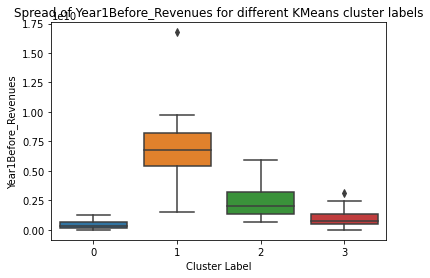

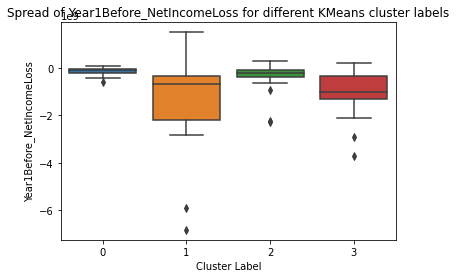

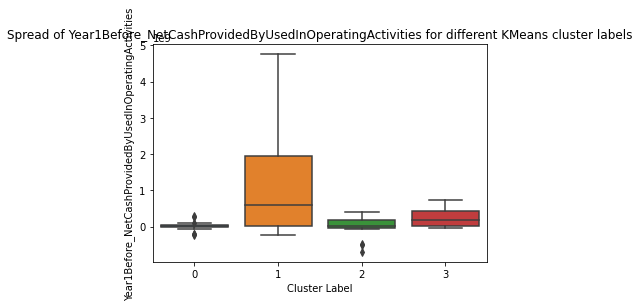

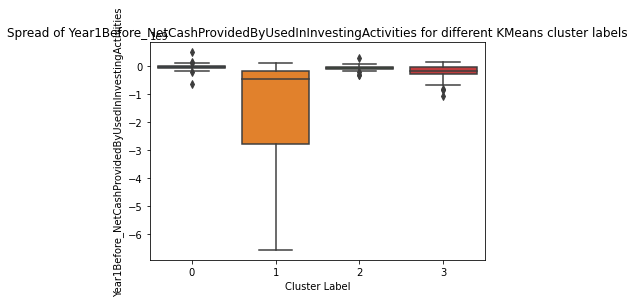

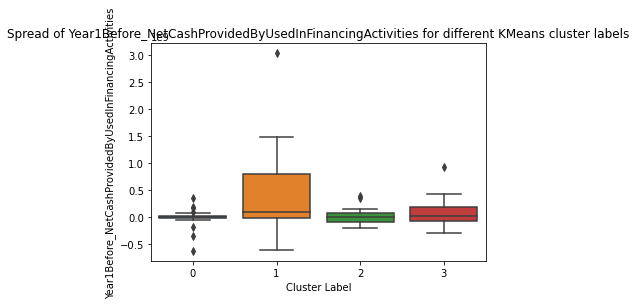

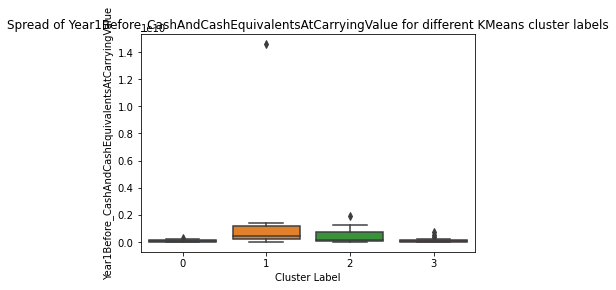

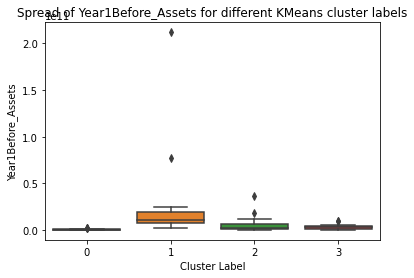

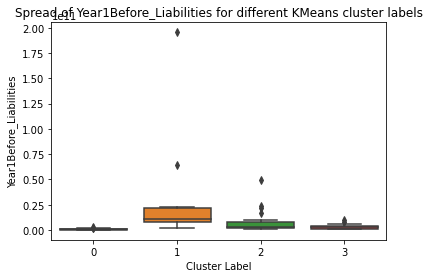

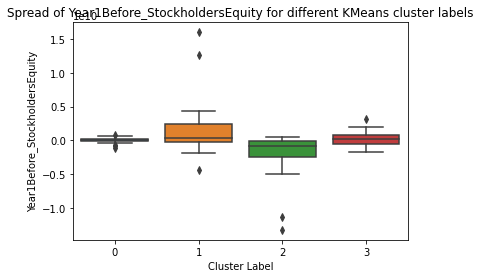

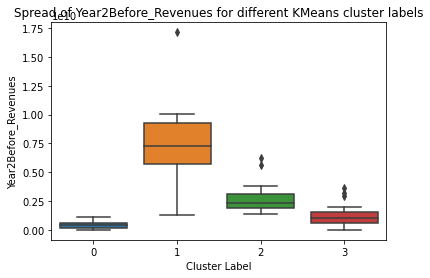

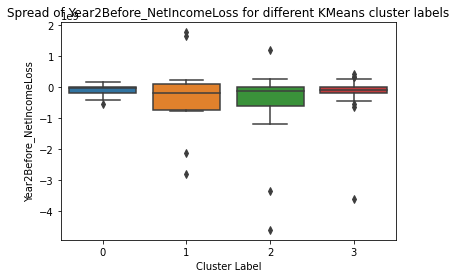

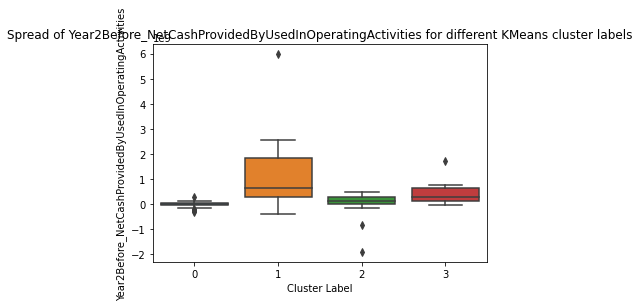

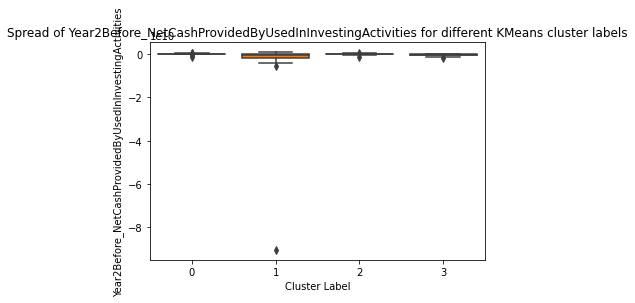

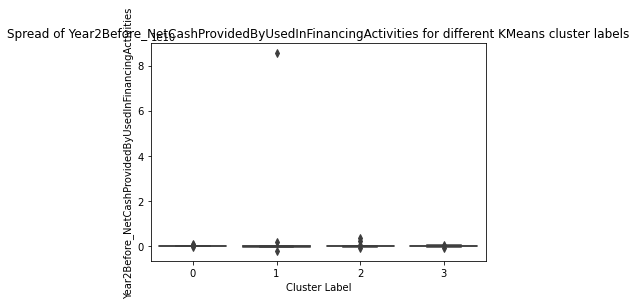

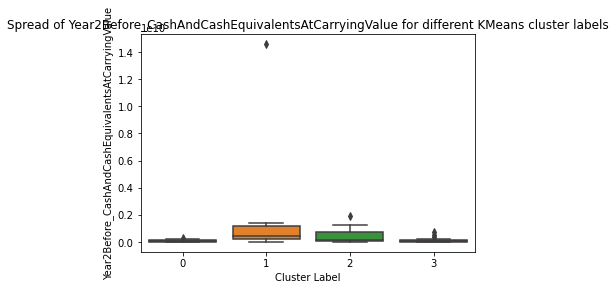

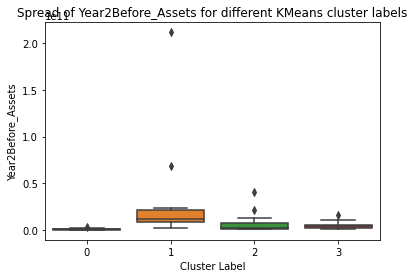

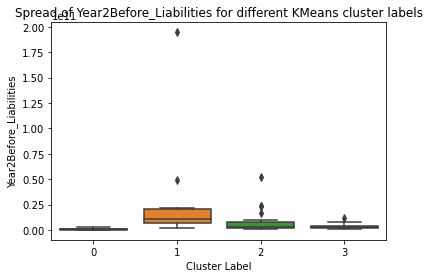

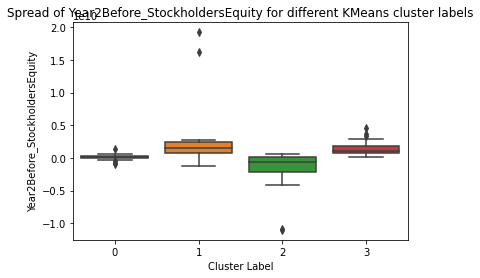

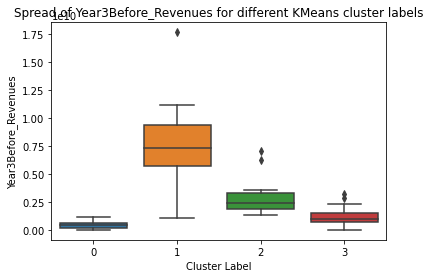

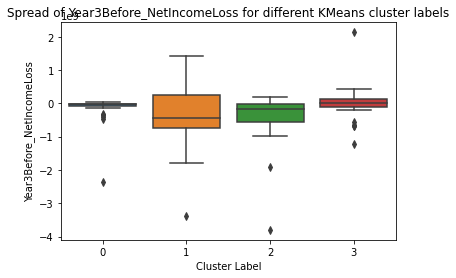

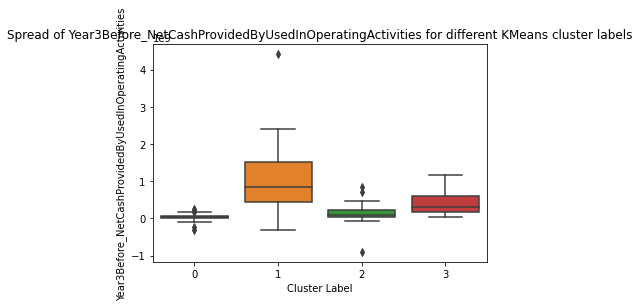

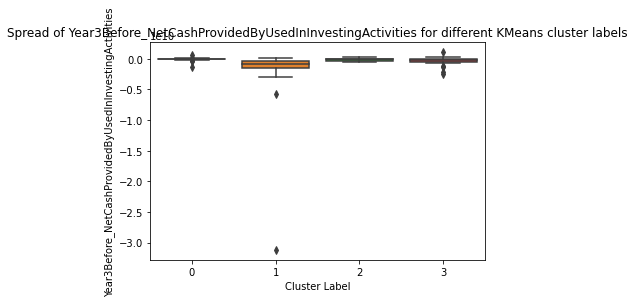

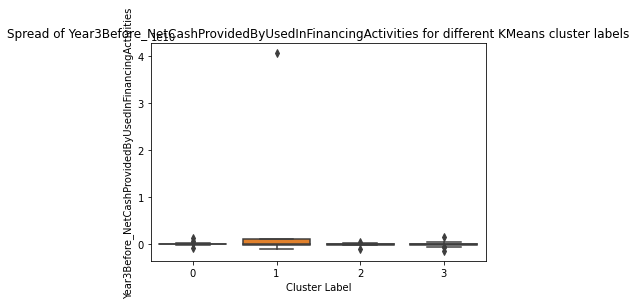

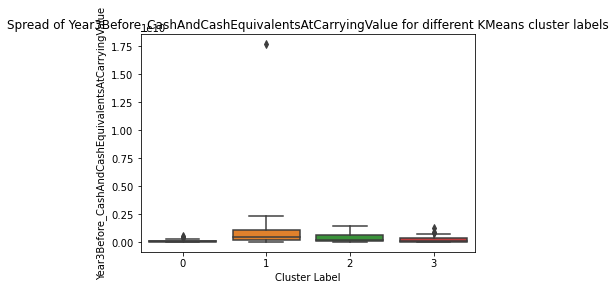

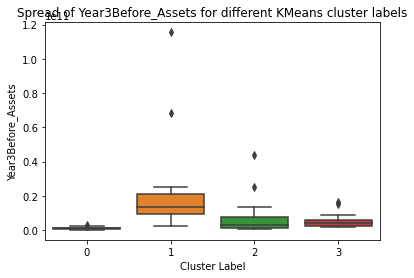

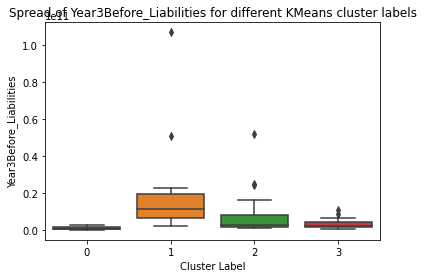

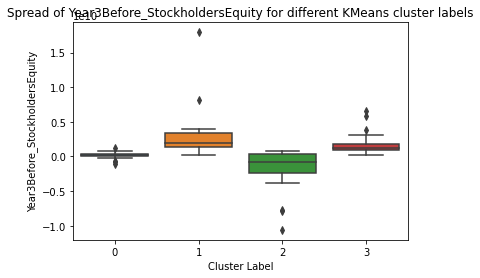

In [212]:
for col in clustering_df.drop(columns='cluster_label'):
    #print(col)
    sns.boxplot(y=col, x='cluster_label', data=clustering_df)
    plt.xlabel("Cluster Label")
    plt.ylabel(col)
    plt.title(f'Spread of {col} for different KMeans cluster labels')
    plt.show()

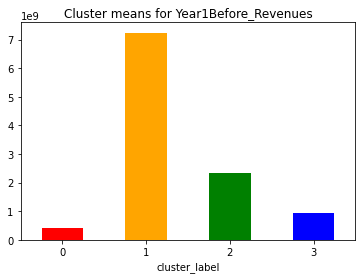

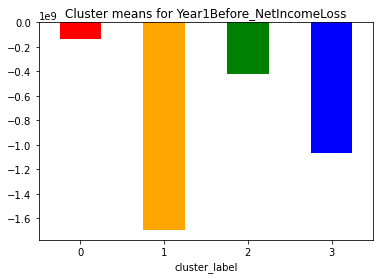

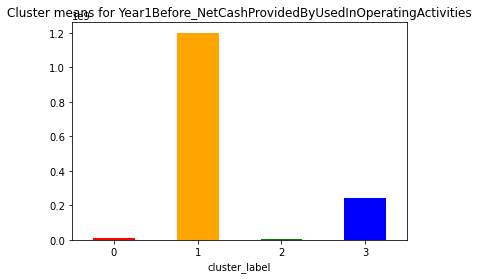

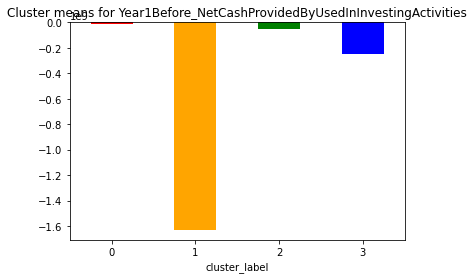

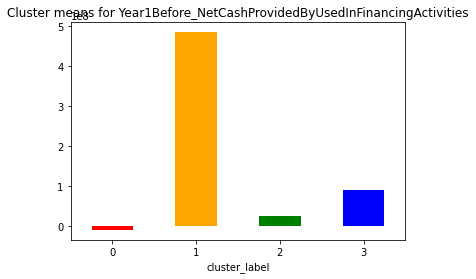

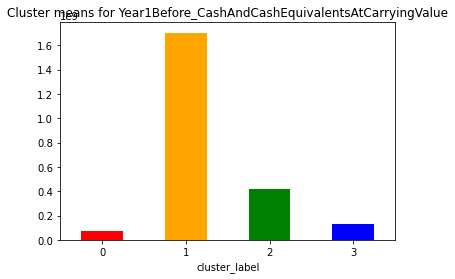

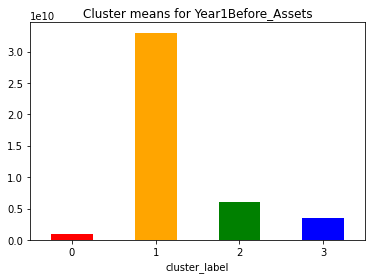

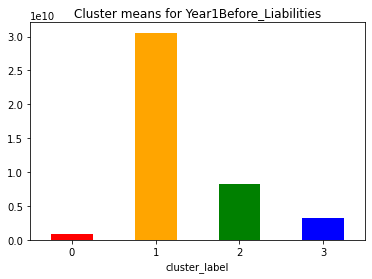

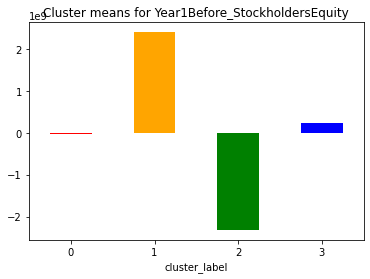

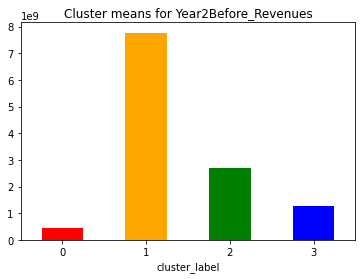

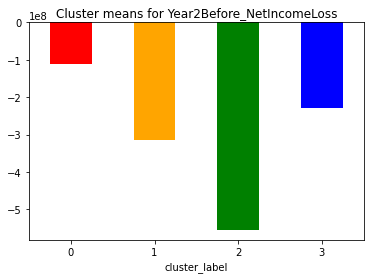

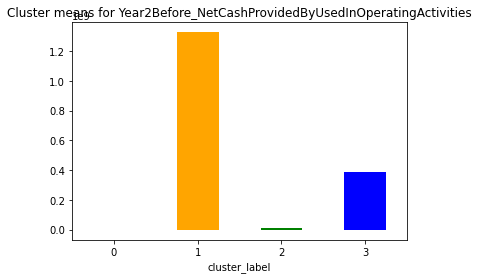

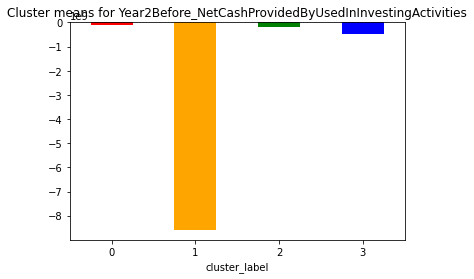

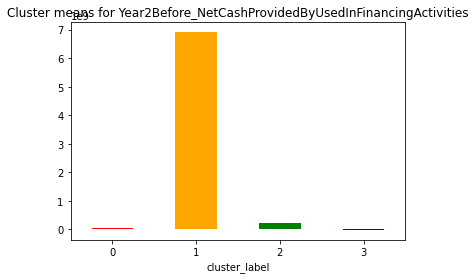

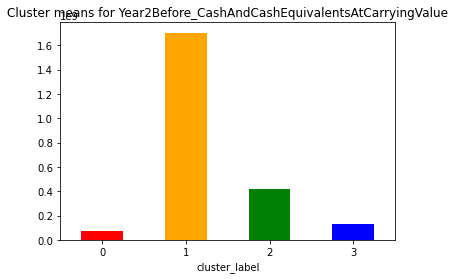

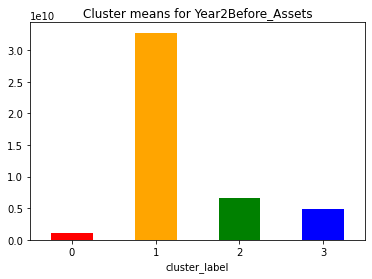

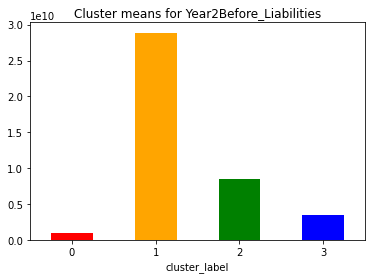

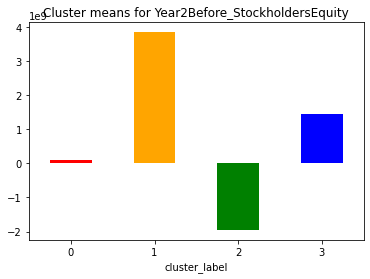

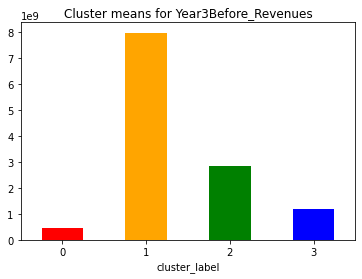

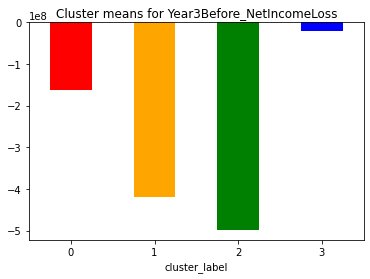

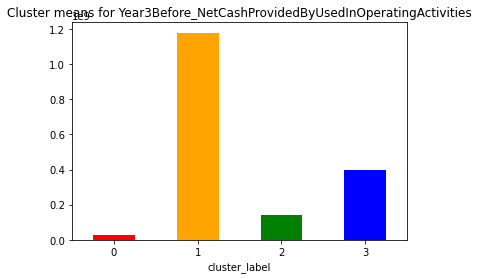

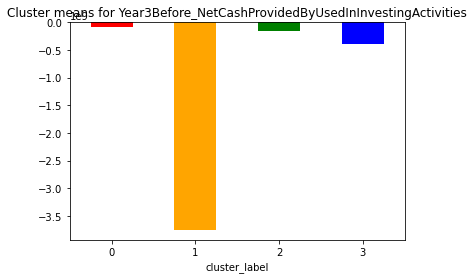

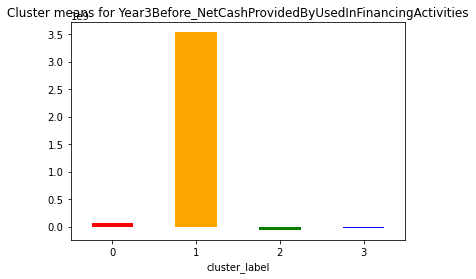

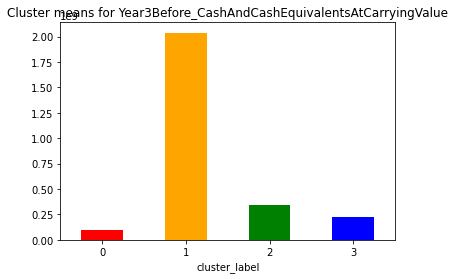

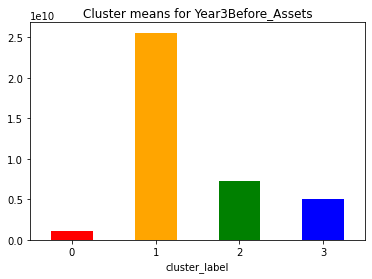

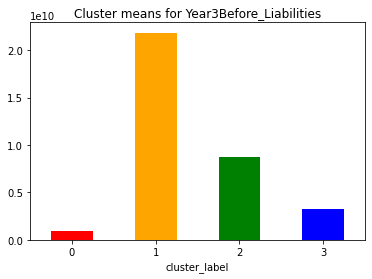

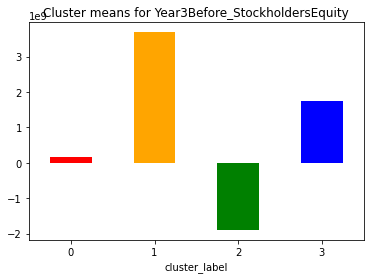

In [213]:
#Let's also look at the difference between the feature means
for feature in kmeans_features.index:
    #print(feature)
    kmeans_features.loc[feature, :].plot(kind='bar', color=['red', 'orange', 'green', 'blue'])
    plt.title(f'Cluster means for {feature}')
    plt.xticks(rotation=0)
    plt.show()


# Use a Decision Tree to better understand how the model got to these conclusions

In [214]:
from sklearn.tree import DecisionTreeClassifier

X= clustering_df.drop(columns='cluster_label')
y=clustering_df['cluster_label']

DT_model = DecisionTreeClassifier(min_impurity_decrease=0.005)
DT_model.fit(X,y)

DecisionTreeClassifier(min_impurity_decrease=0.005)

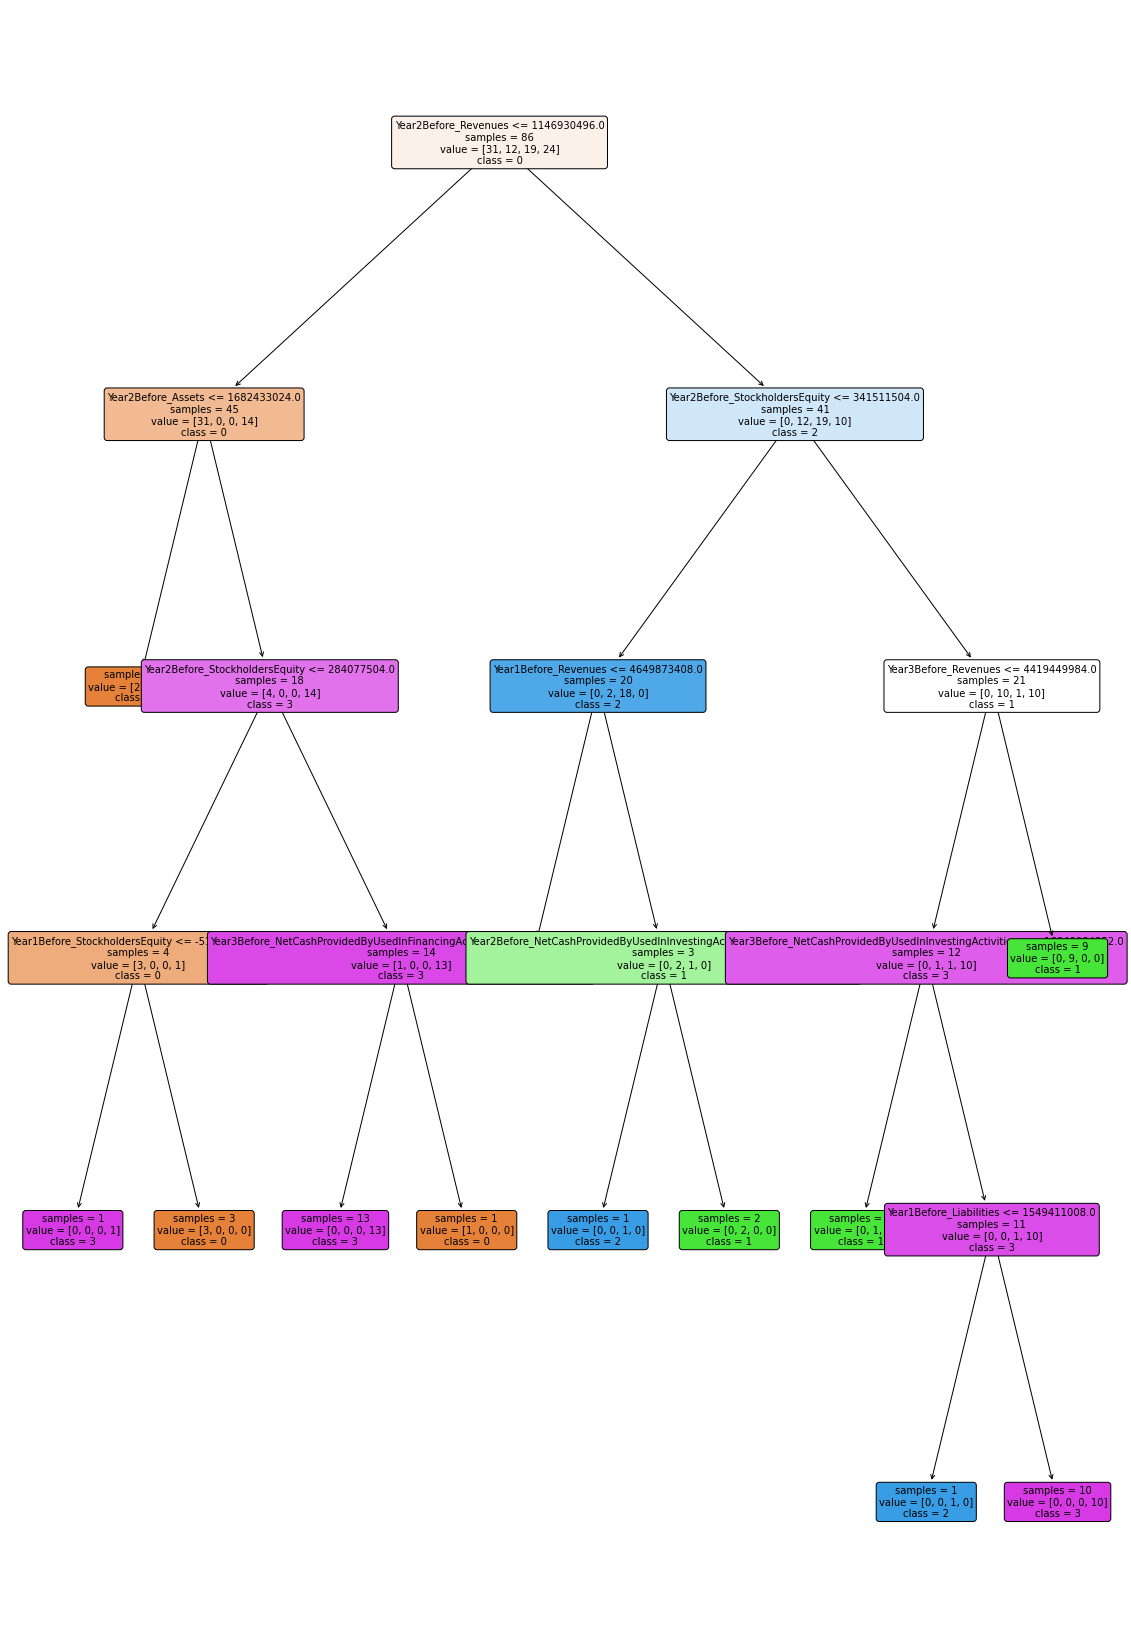

In [215]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,30))

plot_tree(DT_model, 
          feature_names=X.columns, 
          class_names=['0','1','2','3'],
          rounded=True,
          impurity=False,
          ax=ax,
          filled=True,
          fontsize = 10);

In [216]:
clustering_df['cluster_label'].value_counts()

0    31
3    24
2    19
1    12
Name: cluster_label, dtype: int64

### Saving Down

In [225]:
clustering_df

,CIK_number,Year1Before_Revenues,Year1Before_NetIncomeLoss,Year1Before_NetCashProvidedByUsedInOperatingActivities,Year1Before_NetCashProvidedByUsedInInvestingActivities,Year1Before_NetCashProvidedByUsedInFinancingActivities,Year1Before_CashAndCashEquivalentsAtCarryingValue,Year1Before_Assets,Year1Before_Liabilities,Year1Before_StockholdersEquity,...,Year3Before_Revenues,Year3Before_NetIncomeLoss,Year3Before_NetCashProvidedByUsedInOperatingActivities,Year3Before_NetCashProvidedByUsedInInvestingActivities,Year3Before_NetCashProvidedByUsedInFinancingActivities,Year3Before_CashAndCashEquivalentsAtCarryingValue,Year3Before_Assets,Year3Before_Liabilities,Year3Before_StockholdersEquity,cluster_label
0,719739,1.503000e+09,1.509000e+09,2.864000e+09,-3.638000e+09,-9000000.0,1.458600e+10,2.117930e+11,1.954980e+11,1.600400e+10,...,1.057000e+09,1.191000e+09,1.412000e+09,-3.120600e+10,4.065600e+10,1.767500e+10,1.155110e+11,1.070780e+11,8.220000e+09,1
1,886158,7.867778e+09,-5.596230e+08,1.785400e+07,-3.491820e+08,-606018000.0,1.352984e+09,5.130572e+09,4.956427e+09,1.741450e+08,...,1.115858e+10,-6.138160e+08,5.909410e+08,9.137600e+07,-1.828460e+08,1.000340e+09,7.790515e+09,6.025580e+09,1.764935e+09,1
2,1418100,2.490000e+09,-2.096000e+09,3.120000e+08,-1.080000e+08,406000000.0,4.980000e+08,4.073000e+09,5.350000e+09,-1.302000e+09,...,2.873000e+09,-6.800000e+08,1.470000e+08,3.140000e+08,-4.890000e+08,7.270000e+08,6.231000e+09,5.867000e+09,2.360000e+08,3
3,1813756,3.245000e+09,-2.300000e+09,-7.000000e+08,-2.940000e+08,397000000.0,9.240000e+08,1.786300e+10,2.131800e+10,-3.670000e+09,...,3.416000e+09,-3.800000e+09,-9.000000e+08,-4.440000e+08,-4.700000e+07,8.000000e+08,2.535633e+10,2.498192e+10,-7.673785e+09,2
4,1655075,6.499000e+08,-5.300000e+07,-7.030000e+07,4.480000e+07,21500000.0,1.370000e+07,5.170000e+08,3.178000e+08,1.992000e+08,...,6.263000e+08,-5.680000e+07,-6.000000e+06,-2.940000e+07,-1.111000e+08,2.710000e+07,5.022000e+08,2.339000e+08,2.730000e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1311486,2.886590e+08,-1.535140e+08,5.816000e+07,-6.066900e+07,-1950000.0,2.335900e+07,3.929070e+08,4.262360e+08,-3.332900e+07,...,3.848090e+08,4.933000e+06,1.351010e+08,-1.999440e+08,5.813100e+07,2.152500e+07,5.063730e+08,3.928110e+08,1.135620e+08,0
82,1037016,4.711567e+09,-1.649599e+09,-1.924510e+08,-1.776120e+08,776591000.0,1.364953e+09,8.679954e+09,8.324567e+09,3.553870e+08,...,6.380817e+09,2.251960e+08,9.823910e+08,-9.102830e+08,5.250030e+08,2.282155e+09,9.822136e+09,6.684054e+09,3.138082e+09,1
83,1065059,1.307500e+09,-1.589000e+08,8.120000e+07,2.570000e+07,-85600000.0,2.929000e+08,1.705500e+09,2.163700e+09,-4.582000e+08,...,1.600800e+09,-4.911000e+08,5.630000e+07,-1.632000e+08,-6.500000e+06,3.760000e+07,3.549300e+09,2.796900e+09,7.524000e+08,2
84,1120830,1.452813e+08,1.120051e+07,2.967880e+07,-2.016758e+07,-8091334.0,9.622883e+06,2.885008e+08,8.425985e+07,2.042410e+08,...,8.995362e+07,1.722037e+07,1.670200e+07,-7.317144e+07,1.842900e+07,1.004625e+07,2.474486e+08,7.740126e+07,1.700473e+08,0


In [228]:
# Merge back in the company name
clustering_df = clustering_df.merge(bankruptcy_df[['CIK_number','entity.name']],how='left',left_on='CIK_number',right_on='CIK_number')

In [229]:
# Want the CIK_number as it's own column
clustering_df = clustering_df.reset_index()

In [230]:
# Saving down for combining and consolidating
clustering_df.to_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_3/Nov_26/Bankruptcies_Clean_df.csv')

# Classifying Characteristics of Each Cluster Label

adsf asdf asdf